In [1]:
import sys
sys.path.insert(1, '/Users/linusrandud/Documents/UoM/ERP/MscDissertation/Deep-Opt')

In [2]:
import torch
import wandb
import json
import numpy as np
import matplotlib.pyplot as plt
import random
import uuid

/Users/linusrandud/anaconda3/envs/myenv_3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from COProblems.MKP import MKP
from COProblems.QUBO import QUBO
from Models.DOAE import DOAE
from OptimAE import OptimAEHandler

In [4]:
def check_constraints(solution, jobs):
    machine_jobs = [[], []]
    makespans = [0, 0]
    infeasible_count = 0
    
    for job_index, job_assignment in enumerate(solution):
        machine = int(job_assignment)
        job_key = job_index + 1
        job = jobs[job_key]
        machine_jobs[machine].append((job_key, job))
    
    for machine, assigned_jobs in enumerate(machine_jobs):
        current_time = 0
        for job_key, job in sorted(assigned_jobs, key=lambda x: (x[1]['deadline'], x[1]['release'])):
            if current_time < job['release']:
                current_time = job['release']
            current_time += job['duration']
            if current_time > job['deadline']:
                infeasible_count += 1
        makespans[machine] = current_time
    
    if infeasible_count > 0:
        return False, infeasible_count, makespans
    return True, infeasible_count, makespans

def find_extreme_indices(fitnesses, mode='high'):
    if mode not in ['high', 'low']:
        raise ValueError("Mode should be either 'high' or 'low'")

    if mode == 'high':
        extreme_value = max(fitnesses)
    else:
        extreme_value = min(fitnesses)

    return [i for i, value in enumerate(fitnesses) if value == extreme_value]

def convert_tensor_to_unique_np_arrays(tensor):
    np_array = tensor.numpy()
    np_array[np_array == -1] = 0
    unique_arrays = set()
    unique_np_arrays = []
    
    for arr in np_array:
        arr_tuple = tuple(arr)
        if arr_tuple not in unique_arrays:
            unique_arrays.add(arr_tuple)
            unique_np_arrays.append(arr)
    
    unique_np_array = np.array(unique_np_arrays)
    return unique_np_array

def get_solutions(population, fitnesses, mode='low'):
    return convert_tensor_to_unique_np_arrays(population[find_extreme_indices(fitnesses, mode)])

def load_jobs_from_json(file_path):
    with open(file_path, 'r') as f:
        jobs = json.load(f)
    
    # Convert keys to integers
    jobs = {int(k): v for k, v in jobs.items()}
    
    return jobs

In [5]:
# New parameter sets
# datasets = ['ssjsp_4', 'ssjsp_8', 'ssjsp_16', 'ssjsp_20']
datasets = ['ssjsp_22']
constraint_methods = [None, 'binary', 'lagrangian']
pop_size_options = [100, 1000, 10000]

# Parameters
base_params = {
    'change_tolerance': 20,
    'problem_size': None,  # Will be set for each dataset
    'pop_size': 1000,
    'dropout_prob': 0.2,
    'l1_coef': 0.0001,
    'l2_coef': 0.0001,
    'learning_rate': 0.002,
    'max_depth': 6,
    'compression_ratio': 0.8,
    'problem_instance_id': 0,
    'deepest_only': True,
    'encode': True,
    'repair_solutions': True,
    'patience': 5,  # Number of iterations to wait
    'delta_mean_population': 0.1,  # Threshold for mean population change
    'check_constraints': None,
    'penalty_mult': 5
}

# Number of iterations for stability
num_iterations = 5
device = torch.device("cpu")
problem_type = 'QUBO'
use_wandb = True

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.



Starting experiments for dataset ssjsp_22 with population size 100 and constraint method None
Iteration 1/5 for ssjsp_22, constraint method: None, population size: 100


wandb: Currently logged in as: linusrd. Use `wandb login --relogin` to force relogin


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.919921875
Min pop fitness: -10000.0, Mean pop fitness : -9999.4296875
Iteration 1, Depth 1, Evaluations: 2293, Mean Fitness: -9999.4297, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5595703125
Iteration 1, Depth 2, Evaluations: 4495, Mean Fitness: -9999.5596, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.66015625
Iteration 1, Depth 3, Evaluations: 6678, Mean Fitness: -9999.6602, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8203125
Iteration 1, Depth 4, Evaluations: 8882, Mean Fitness: -9999.8203, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9296875
Iteration 1, Depth 5, Evaluations: 11090, Mean Fitness: -9999.9297, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.98046875
Iteration 1, Depth 6, Evaluations: 13230, Mean Fitness: -9999.9805, Min Fitness: -10000

current_iteration,▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇█████
mean_fitness,█▆▅▃▂▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▃▃▄▅▆▆▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
current_iteration,1
dataset,ssjsp_22
depth,6


Iteration 2/5 for ssjsp_22, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.4599609375
Min pop fitness: -10000.0, Mean pop fitness : -9999.5400390625
Iteration 2, Depth 1, Evaluations: 2443, Mean Fitness: -9999.5400, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6904296875
Iteration 2, Depth 2, Evaluations: 4722, Mean Fitness: -9999.6904, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7900390625
Iteration 2, Depth 3, Evaluations: 6920, Mean Fitness: -9999.7900, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8896484375
Iteration 2, Depth 4, Evaluations: 9125, Mean Fitness: -9999.8896, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9501953125
Iteration 2, Depth 5, Evaluations: 11242, Mean Fitness: -9999.9502, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9697265625
Iteration 2, Depth 6, Evaluations: 13347, Mean Fitness: -9999.9697, Min F

current_iteration,▁▁▁▁▁▁▁
depth,▁▂▄▅▇██
mean_fitness,█▆▄▂▁▁▁
min_max_fitness,▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁
total_eval,▁▂▃▅▆▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
current_iteration,2
dataset,ssjsp_22
depth,6


Iteration 3/5 for ssjsp_22, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.83984375
Min pop fitness: -10000.0, Mean pop fitness : -9999.4296875
Iteration 3, Depth 1, Evaluations: 2416, Mean Fitness: -9999.4297, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5703125
Iteration 3, Depth 2, Evaluations: 4661, Mean Fitness: -9999.5703, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7099609375
Iteration 3, Depth 3, Evaluations: 6882, Mean Fitness: -9999.7100, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.849609375
Iteration 3, Depth 4, Evaluations: 9107, Mean Fitness: -9999.8496, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8896484375
Iteration 3, Depth 5, Evaluations: 11238, Mean Fitness: -9999.8896, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9599609375
Iteration 3, Depth 6, Evaluations: 13392, Mean Fitness: -9999.9600, Min Fitness: -

current_iteration,▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇████
mean_fitness,█▆▅▃▂▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁
total_eval,▁▂▃▄▅▅▆▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
current_iteration,3
dataset,ssjsp_22
depth,6


Iteration 4/5 for ssjsp_22, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.01953125
Min pop fitness: -10000.0, Mean pop fitness : -9999.5
Iteration 4, Depth 1, Evaluations: 2468, Mean Fitness: -9999.5000, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7197265625
Iteration 4, Depth 2, Evaluations: 4715, Mean Fitness: -9999.7197, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.83984375
Iteration 4, Depth 3, Evaluations: 6920, Mean Fitness: -9999.8398, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8896484375
Iteration 4, Depth 4, Evaluations: 9070, Mean Fitness: -9999.8896, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9296875
Iteration 4, Depth 5, Evaluations: 11205, Mean Fitness: -9999.9297, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9697265625
Iteration 4, Depth 6, Evaluations: 13326, Mean Fitness: -9999.9697, Min Fitness: -10000.0

current_iteration,▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███
mean_fitness,█▅▃▃▂▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁
total_eval,▁▂▃▄▅▆▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
current_iteration,4
dataset,ssjsp_22
depth,6


Iteration 5/5 for ssjsp_22, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.580078125
Min pop fitness: -10000.0, Mean pop fitness : -9999.48046875
Iteration 5, Depth 1, Evaluations: 2388, Mean Fitness: -9999.4805, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.66015625
Iteration 5, Depth 2, Evaluations: 4708, Mean Fitness: -9999.6602, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7900390625
Iteration 5, Depth 3, Evaluations: 6934, Mean Fitness: -9999.7900, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.900390625
Iteration 5, Depth 4, Evaluations: 9120, Mean Fitness: -9999.9004, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9404296875
Iteration 5, Depth 5, Evaluations: 11261, Mean Fitness: -9999.9404, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.98046875
Iteration 5, Depth 6, Evaluations: 13385, Mean Fitness: -9999.9805, Min Fitness: 

current_iteration,▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇████
mean_fitness,█▆▄▂▂▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁
total_eval,▁▂▃▄▅▅▆▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
current_iteration,5
dataset,ssjsp_22
depth,6



Starting experiments for dataset ssjsp_22 with population size 1000 and constraint method None
Iteration 1/5 for ssjsp_22, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.9130859375
Min pop fitness: -10000.0, Mean pop fitness : -9999.53125
Iteration 1, Depth 1, Evaluations: 23900, Mean Fitness: -9999.5312, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7255859375
Iteration 1, Depth 2, Evaluations: 46598, Mean Fitness: -9999.7256, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8505859375
Iteration 1, Depth 3, Evaluations: 68740, Mean Fitness: -9999.8506, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.919921875
Iteration 1, Depth 4, Evaluations: 90311, Mean Fitness: -9999.9199, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.962890625
Iteration 1, Depth 5, Evaluations: 111717, Mean Fitness: -9999.9629, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.984375
Iteration 1, Depth 6, Evaluations: 132915, Mean Fitness: -9999.9844, Min Fitnes

current_iteration,▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███
mean_fitness,█▅▃▂▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁
total_eval,▁▂▃▄▅▆▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
current_iteration,1
dataset,ssjsp_22
depth,6


Iteration 2/5 for ssjsp_22, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.98046875
Min pop fitness: -10000.0, Mean pop fitness : -9999.482421875
Iteration 2, Depth 1, Evaluations: 23671, Mean Fitness: -9999.4824, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.65234375
Iteration 2, Depth 2, Evaluations: 46235, Mean Fitness: -9999.6523, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7998046875
Iteration 2, Depth 3, Evaluations: 68660, Mean Fitness: -9999.7998, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.890625
Iteration 2, Depth 4, Evaluations: 90496, Mean Fitness: -9999.8906, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9462890625
Iteration 2, Depth 5, Evaluations: 112004, Mean Fitness: -9999.9463, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.984375
Iteration 2, Depth 6, Evaluations: 133345, Mean Fitness: -9999.9844, Min Fitness:

current_iteration,▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███
mean_fitness,█▆▄▂▂▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁
total_eval,▁▂▃▄▅▆▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
current_iteration,2
dataset,ssjsp_22
depth,6


Iteration 3/5 for ssjsp_22, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.9482421875
Min pop fitness: -10000.0, Mean pop fitness : -9999.505859375
Iteration 3, Depth 1, Evaluations: 24001, Mean Fitness: -9999.5059, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6982421875
Iteration 3, Depth 2, Evaluations: 46882, Mean Fitness: -9999.6982, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.837890625
Iteration 3, Depth 3, Evaluations: 69224, Mean Fitness: -9999.8379, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.91796875
Iteration 3, Depth 4, Evaluations: 90960, Mean Fitness: -9999.9180, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.958984375
Iteration 3, Depth 5, Evaluations: 112285, Mean Fitness: -9999.9590, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.98828125
Iteration 3, Depth 6, Evaluations: 133535, Mean Fitness: -9999.9883, Min Fi

current_iteration,▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███
mean_fitness,█▅▃▂▂▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁
total_eval,▁▂▃▄▅▆▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
current_iteration,3
dataset,ssjsp_22
depth,6


Iteration 4/5 for ssjsp_22, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.646484375
Min pop fitness: -10000.0, Mean pop fitness : -9999.4990234375
Iteration 4, Depth 1, Evaluations: 23794, Mean Fitness: -9999.4990, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.708984375
Iteration 4, Depth 2, Evaluations: 46746, Mean Fitness: -9999.7090, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8369140625
Iteration 4, Depth 3, Evaluations: 69025, Mean Fitness: -9999.8369, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9111328125
Iteration 4, Depth 4, Evaluations: 90728, Mean Fitness: -9999.9111, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9619140625
Iteration 4, Depth 5, Evaluations: 112168, Mean Fitness: -9999.9619, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.982421875
Iteration 4, Depth 6, Evaluations: 133342, Mean Fitness: -9999.9824, Mi

current_iteration,▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███
mean_fitness,█▅▃▂▂▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁
total_eval,▁▂▃▄▅▆▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
current_iteration,4
dataset,ssjsp_22
depth,6


Iteration 5/5 for ssjsp_22, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.9033203125
Min pop fitness: -10000.0, Mean pop fitness : -9999.48828125
Iteration 5, Depth 1, Evaluations: 24027, Mean Fitness: -9999.4883, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7177734375
Iteration 5, Depth 2, Evaluations: 46888, Mean Fitness: -9999.7178, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.830078125
Iteration 5, Depth 3, Evaluations: 68844, Mean Fitness: -9999.8301, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9111328125
Iteration 5, Depth 4, Evaluations: 90623, Mean Fitness: -9999.9111, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9541015625
Iteration 5, Depth 5, Evaluations: 111994, Mean Fitness: -9999.9541, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.98046875
Iteration 5, Depth 6, Evaluations: 133243, Mean Fitness: -9999.9805, Min 

current_iteration,▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███
mean_fitness,█▅▃▂▂▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁
total_eval,▁▂▃▄▅▆▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
current_iteration,5
dataset,ssjsp_22
depth,6



Starting experiments for dataset ssjsp_22 with population size 10000 and constraint method None
Iteration 1/5 for ssjsp_22, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.8740234375
Min pop fitness: -10000.0, Mean pop fitness : -9999.4931640625
Iteration 1, Depth 1, Evaluations: 238488, Mean Fitness: -9999.4932, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6845703125
Iteration 1, Depth 2, Evaluations: 465110, Mean Fitness: -9999.6846, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.81640625
Iteration 1, Depth 3, Evaluations: 687390, Mean Fitness: -9999.8164, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9091796875
Iteration 1, Depth 4, Evaluations: 906113, Mean Fitness: -9999.9092, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9541015625
Iteration 1, Depth 5, Evaluations: 1120580, Mean Fitness: -9999.9541, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9775390625
Iteration 1, Depth 6, Evaluations: 1332611, Mean Fitness: -9999.9

current_iteration,▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███
mean_fitness,█▅▃▂▂▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁
total_eval,▁▂▃▄▅▆▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
current_iteration,1
dataset,ssjsp_22
depth,6


Iteration 2/5 for ssjsp_22, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.8544921875
Min pop fitness: -10000.0, Mean pop fitness : -9999.48046875
Iteration 2, Depth 1, Evaluations: 238331, Mean Fitness: -9999.4805, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.697265625
Iteration 2, Depth 2, Evaluations: 466437, Mean Fitness: -9999.6973, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8505859375
Iteration 2, Depth 3, Evaluations: 690246, Mean Fitness: -9999.8506, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9267578125
Iteration 2, Depth 4, Evaluations: 907496, Mean Fitness: -9999.9268, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.96484375
Iteration 2, Depth 5, Evaluations: 1120936, Mean Fitness: -9999.9648, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9853515625
Iteration 2, Depth 6, Evaluations: 1332762, Mean Fitness: -9999.9854

current_iteration,▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███
mean_fitness,█▅▃▂▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁
total_eval,▁▂▃▄▅▆▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
current_iteration,2
dataset,ssjsp_22
depth,6


Iteration 3/5 for ssjsp_22, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.90234375
Min pop fitness: -10000.0, Mean pop fitness : -9999.5283203125
Iteration 3, Depth 1, Evaluations: 242241, Mean Fitness: -9999.5283, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.76171875
Iteration 3, Depth 2, Evaluations: 472735, Mean Fitness: -9999.7617, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8828125
Iteration 3, Depth 3, Evaluations: 693530, Mean Fitness: -9999.8828, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.947265625
Iteration 3, Depth 4, Evaluations: 909591, Mean Fitness: -9999.9473, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9755859375
Iteration 3, Depth 5, Evaluations: 1122172, Mean Fitness: -9999.9756, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9892578125
Iteration 3, Depth 6, Evaluations: 1333445, Mean Fitness: -9999.9893, M

current_iteration,▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███
mean_fitness,█▅▃▂▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁
total_eval,▁▂▃▄▅▆▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
current_iteration,3
dataset,ssjsp_22
depth,6


Iteration 4/5 for ssjsp_22, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.8818359375
Min pop fitness: -10000.0, Mean pop fitness : -9999.498046875
Iteration 4, Depth 1, Evaluations: 240050, Mean Fitness: -9999.4980, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7236328125
Iteration 4, Depth 2, Evaluations: 469438, Mean Fitness: -9999.7236, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.85546875
Iteration 4, Depth 3, Evaluations: 691213, Mean Fitness: -9999.8555, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9345703125
Iteration 4, Depth 4, Evaluations: 908656, Mean Fitness: -9999.9346, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9716796875
Iteration 4, Depth 5, Evaluations: 1122062, Mean Fitness: -9999.9717, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.986328125
Iteration 4, Depth 6, Evaluations: 1333539, Mean Fitness: -9999.986

current_iteration,▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███
mean_fitness,█▅▃▂▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁
total_eval,▁▂▃▄▅▆▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
current_iteration,4
dataset,ssjsp_22
depth,6


Iteration 5/5 for ssjsp_22, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.8818359375
Min pop fitness: -10000.0, Mean pop fitness : -9999.48828125
Iteration 5, Depth 1, Evaluations: 238367, Mean Fitness: -9999.4883, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6884765625
Iteration 5, Depth 2, Evaluations: 465683, Mean Fitness: -9999.6885, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.826171875
Iteration 5, Depth 3, Evaluations: 688690, Mean Fitness: -9999.8262, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.912109375
Iteration 5, Depth 4, Evaluations: 906580, Mean Fitness: -9999.9121, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9609375
Iteration 5, Depth 5, Evaluations: 1120937, Mean Fitness: -9999.9609, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9833984375
Iteration 5, Depth 6, Evaluations: 1333099, Mean Fitness: -9999.9834, 

current_iteration,▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███
mean_fitness,█▅▃▂▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁
total_eval,▁▂▃▄▅▆▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
current_iteration,5
dataset,ssjsp_22
depth,6



Starting experiments for dataset ssjsp_22 with population size 100 and constraint method binary
Iteration 1/5 for ssjsp_22, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -9995.0, Mean pop fitness : -9966.5703125
Min pop fitness: -10000.0, Mean pop fitness : -9973.9404296875
Iteration 1, Depth 1, Evaluations: 3114, Mean Fitness: -9973.9404, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9979.76953125
Iteration 1, Depth 2, Evaluations: 5969, Mean Fitness: -9979.7695, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9985.6796875
Iteration 1, Depth 3, Evaluations: 8958, Mean Fitness: -9985.6797, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9989.6796875
Iteration 1, Depth 4, Evaluations: 11559, Mean Fitness: -9989.6797, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.0498046875
Iteration 1, Depth 5, Evaluations: 14253, Mean Fitness: -9993.0498, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.099609375
Iteration 1, Depth 6, Evaluations: 16869, Mean Fitness: -9996.0996, Min Fitness: -100

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███████████
mean_fitness,█▆▅▄▃▂▂▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▅▅▆▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,binary
current_iteration,1
dataset,ssjsp_22


Iteration 2/5 for ssjsp_22, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -9995.0, Mean pop fitness : -9966.6103515625
Min pop fitness: -9995.0, Mean pop fitness : -9972.419921875
Iteration 2, Depth 1, Evaluations: 2681, Mean Fitness: -9972.4199, Min Fitness: -9995.0000
Min pop fitness: -10000.0, Mean pop fitness : -9979.33984375
Iteration 2, Depth 2, Evaluations: 5380, Mean Fitness: -9979.3398, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9985.4697265625
Iteration 2, Depth 3, Evaluations: 8337, Mean Fitness: -9985.4697, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9989.349609375
Iteration 2, Depth 4, Evaluations: 11020, Mean Fitness: -9989.3496, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.8603515625
Iteration 2, Depth 5, Evaluations: 13737, Mean Fitness: -9993.8604, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.4599609375
Iteration 2, Depth 6, Evaluations: 16256, Mean Fitness: -9996.4600, Min Fitness

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇██████████
mean_fitness,█▆▅▄▃▂▁▁▁▁▁▁▁▁▁
min_max_fitness,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▅▅▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,binary
current_iteration,2
dataset,ssjsp_22


Iteration 3/5 for ssjsp_22, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -9994.0, Mean pop fitness : -9967.0
Min pop fitness: -9995.0, Mean pop fitness : -9975.6298828125
Iteration 3, Depth 1, Evaluations: 3007, Mean Fitness: -9975.6299, Min Fitness: -9995.0000
Min pop fitness: -10000.0, Mean pop fitness : -9981.5302734375
Iteration 3, Depth 2, Evaluations: 5928, Mean Fitness: -9981.5303, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9987.099609375
Iteration 3, Depth 3, Evaluations: 8621, Mean Fitness: -9987.0996, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.2998046875
Iteration 3, Depth 4, Evaluations: 11325, Mean Fitness: -9992.2998, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.0400390625
Iteration 3, Depth 5, Evaluations: 13862, Mean Fitness: -9995.0400, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.849609375
Iteration 3, Depth 6, Evaluations: 16323, Mean Fitness: -9996.8496, Min Fitness: -1000

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇████████████
mean_fitness,█▆▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁
min_max_fitness,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▄▅▅▆▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,binary
current_iteration,3
dataset,ssjsp_22


Iteration 4/5 for ssjsp_22, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -9991.0, Mean pop fitness : -9966.76953125
Min pop fitness: -10000.0, Mean pop fitness : -9976.150390625
Iteration 4, Depth 1, Evaluations: 2913, Mean Fitness: -9976.1504, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9980.3798828125
Iteration 4, Depth 2, Evaluations: 5623, Mean Fitness: -9980.3799, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9986.01953125
Iteration 4, Depth 3, Evaluations: 8311, Mean Fitness: -9986.0195, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9990.41015625
Iteration 4, Depth 4, Evaluations: 10993, Mean Fitness: -9990.4102, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.9501953125
Iteration 4, Depth 5, Evaluations: 13701, Mean Fitness: -9993.9502, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.41015625
Iteration 4, Depth 6, Evaluations: 16165, Mean Fitness: -9996.4102, Min Fitness: -

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇██████████
mean_fitness,█▇▅▄▃▂▂▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▅▅▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,binary
current_iteration,4
dataset,ssjsp_22


Iteration 5/5 for ssjsp_22, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -9994.0, Mean pop fitness : -9965.58984375
Min pop fitness: -9994.0, Mean pop fitness : -9972.4404296875
Iteration 5, Depth 1, Evaluations: 2885, Mean Fitness: -9972.4404, Min Fitness: -9994.0000
Min pop fitness: -9995.0, Mean pop fitness : -9976.669921875
Iteration 5, Depth 2, Evaluations: 5424, Mean Fitness: -9976.6699, Min Fitness: -9995.0000
Min pop fitness: -10000.0, Mean pop fitness : -9982.259765625
Iteration 5, Depth 3, Evaluations: 8149, Mean Fitness: -9982.2598, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9988.740234375
Iteration 5, Depth 4, Evaluations: 10995, Mean Fitness: -9988.7402, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.6103515625
Iteration 5, Depth 5, Evaluations: 13727, Mean Fitness: -9993.6104, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.6103515625
Iteration 5, Depth 6, Evaluations: 16258, Mean Fitness: -9997.6104, Min Fitness: -

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇████████
mean_fitness,█▇▆▄▃▂▁▁▁▁▁▁▁
min_max_fitness,█▇▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▄▄▅▅▆▆▇▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,binary
current_iteration,5
dataset,ssjsp_22



Starting experiments for dataset ssjsp_22 with population size 1000 and constraint method binary
Iteration 1/5 for ssjsp_22, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9966.0341796875
Min pop fitness: -10000.0, Mean pop fitness : -9975.6474609375
Iteration 1, Depth 1, Evaluations: 30474, Mean Fitness: -9975.6475, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9982.31640625
Iteration 1, Depth 2, Evaluations: 59243, Mean Fitness: -9982.3164, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9988.0224609375
Iteration 1, Depth 3, Evaluations: 87101, Mean Fitness: -9988.0225, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.26953125
Iteration 1, Depth 4, Evaluations: 114330, Mean Fitness: -9992.2695, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.140625
Iteration 1, Depth 5, Evaluations: 139934, Mean Fitness: -9995.1406, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.7548828125
Iteration 1, Depth 6, Evaluations: 163885, Mean Fitness: -9996.7549, Min Fi

/var/folders/fh/7sz134vx5jq6_78w16smcs3h0000gn/T/ipykernel_2931/2270195462.py:108: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6))


current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███████████
mean_fitness,█▆▄▃▂▂▂▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,binary
current_iteration,1
dataset,ssjsp_22


Iteration 2/5 for ssjsp_22, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9965.6689453125
Min pop fitness: -10000.0, Mean pop fitness : -9975.6435546875
Iteration 2, Depth 1, Evaluations: 30910, Mean Fitness: -9975.6436, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9983.240234375
Iteration 2, Depth 2, Evaluations: 60024, Mean Fitness: -9983.2402, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9987.314453125
Iteration 2, Depth 3, Evaluations: 86683, Mean Fitness: -9987.3145, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.6845703125
Iteration 2, Depth 4, Evaluations: 113895, Mean Fitness: -9991.6846, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.564453125
Iteration 2, Depth 5, Evaluations: 139096, Mean Fitness: -9994.5645, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.7978515625
Iteration 2, Depth 6, Evaluations: 163935, Mean Fitness: -9996.7979, M

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇████████████
mean_fitness,█▆▅▃▃▂▂▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▄▅▅▆▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,binary
current_iteration,2
dataset,ssjsp_22


Iteration 3/5 for ssjsp_22, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9965.8623046875
Min pop fitness: -10000.0, Mean pop fitness : -9975.62109375
Iteration 3, Depth 1, Evaluations: 31247, Mean Fitness: -9975.6211, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9983.2373046875
Iteration 3, Depth 2, Evaluations: 61128, Mean Fitness: -9983.2373, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9988.37890625
Iteration 3, Depth 3, Evaluations: 89004, Mean Fitness: -9988.3789, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.017578125
Iteration 3, Depth 4, Evaluations: 115960, Mean Fitness: -9992.0176, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.9150390625
Iteration 3, Depth 5, Evaluations: 141574, Mean Fitness: -9994.9150, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.4365234375
Iteration 3, Depth 6, Evaluations: 165123, Mean Fitness: -9996.4365, Min

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇████████████
mean_fitness,█▆▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▄▅▅▆▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,binary
current_iteration,3
dataset,ssjsp_22


Iteration 4/5 for ssjsp_22, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9966.171875
Min pop fitness: -10000.0, Mean pop fitness : -9975.7998046875
Iteration 4, Depth 1, Evaluations: 31103, Mean Fitness: -9975.7998, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9982.623046875
Iteration 4, Depth 2, Evaluations: 59836, Mean Fitness: -9982.6230, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9987.3984375
Iteration 4, Depth 3, Evaluations: 87796, Mean Fitness: -9987.3984, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.6484375
Iteration 4, Depth 4, Evaluations: 115344, Mean Fitness: -9991.6484, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.580078125
Iteration 4, Depth 5, Evaluations: 141542, Mean Fitness: -9994.5801, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.521484375
Iteration 4, Depth 6, Evaluations: 166131, Mean Fitness: -9996.5215, Min Fitness

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███████████████
mean_fitness,█▆▅▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▁▂▂▃▃▄▄▄▅▅▅▆▆▆▇▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,binary
current_iteration,4
dataset,ssjsp_22


Iteration 5/5 for ssjsp_22, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9966.7021484375
Min pop fitness: -10000.0, Mean pop fitness : -9976.443359375
Iteration 5, Depth 1, Evaluations: 30240, Mean Fitness: -9976.4434, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9982.640625
Iteration 5, Depth 2, Evaluations: 58296, Mean Fitness: -9982.6406, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9987.6201171875
Iteration 5, Depth 3, Evaluations: 86146, Mean Fitness: -9987.6201, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.4755859375
Iteration 5, Depth 4, Evaluations: 112517, Mean Fitness: -9991.4756, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.6279296875
Iteration 5, Depth 5, Evaluations: 138150, Mean Fitness: -9994.6279, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.8369140625
Iteration 5, Depth 6, Evaluations: 162413, Mean Fitness: -9996.8369, Min

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███████████
mean_fitness,█▆▅▄▃▂▂▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,binary
current_iteration,5
dataset,ssjsp_22



Starting experiments for dataset ssjsp_22 with population size 10000 and constraint method binary
Iteration 1/5 for ssjsp_22, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9966.3974609375
Min pop fitness: -10000.0, Mean pop fitness : -9976.263671875
Iteration 1, Depth 1, Evaluations: 310696, Mean Fitness: -9976.2637, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9982.783203125
Iteration 1, Depth 2, Evaluations: 600777, Mean Fitness: -9982.7832, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9987.6201171875
Iteration 1, Depth 3, Evaluations: 877597, Mean Fitness: -9987.6201, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.1640625
Iteration 1, Depth 4, Evaluations: 1145013, Mean Fitness: -9991.1641, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.1083984375
Iteration 1, Depth 5, Evaluations: 1404169, Mean Fitness: -9994.1084, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.19921875
Iteration 1, Depth 6, Evaluations: 1650091, Mean Fitness: -9996.1992,

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███████████
mean_fitness,█▆▅▄▃▂▂▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,binary
current_iteration,1
dataset,ssjsp_22


Iteration 2/5 for ssjsp_22, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9966.63671875
Min pop fitness: -10000.0, Mean pop fitness : -9976.9873046875
Iteration 2, Depth 1, Evaluations: 314787, Mean Fitness: -9976.9873, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9983.31640625
Iteration 2, Depth 2, Evaluations: 602795, Mean Fitness: -9983.3164, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9987.9345703125
Iteration 2, Depth 3, Evaluations: 879463, Mean Fitness: -9987.9346, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.626953125
Iteration 2, Depth 4, Evaluations: 1148206, Mean Fitness: -9991.6270, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.26171875
Iteration 2, Depth 5, Evaluations: 1403949, Mean Fitness: -9994.2617, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.1328125
Iteration 2, Depth 6, Evaluations: 1647868, Mean Fitness: -9996.1328, Mi

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇████████████████
mean_fitness,█▆▅▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▁▂▂▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,binary
current_iteration,2
dataset,ssjsp_22


Iteration 3/5 for ssjsp_22, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9966.236328125
Min pop fitness: -10000.0, Mean pop fitness : -9976.599609375
Iteration 3, Depth 1, Evaluations: 313517, Mean Fitness: -9976.5996, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9983.220703125
Iteration 3, Depth 2, Evaluations: 602617, Mean Fitness: -9983.2207, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9987.732421875
Iteration 3, Depth 3, Evaluations: 877321, Mean Fitness: -9987.7324, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.419921875
Iteration 3, Depth 4, Evaluations: 1145054, Mean Fitness: -9991.4199, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.365234375
Iteration 3, Depth 5, Evaluations: 1402323, Mean Fitness: -9994.3652, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.4404296875
Iteration 3, Depth 6, Evaluations: 1645841, Mean Fitness: -9996.4404

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇█████████████
mean_fitness,█▆▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▂▃▃▄▄▅▅▅▆▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,binary
current_iteration,3
dataset,ssjsp_22


Iteration 4/5 for ssjsp_22, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9966.447265625
Min pop fitness: -10000.0, Mean pop fitness : -9977.4248046875
Iteration 4, Depth 1, Evaluations: 318290, Mean Fitness: -9977.4248, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9984.2099609375
Iteration 4, Depth 2, Evaluations: 613702, Mean Fitness: -9984.2100, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9988.9951171875
Iteration 4, Depth 3, Evaluations: 891006, Mean Fitness: -9988.9951, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.4228515625
Iteration 4, Depth 4, Evaluations: 1154992, Mean Fitness: -9992.4229, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.08203125
Iteration 4, Depth 5, Evaluations: 1409672, Mean Fitness: -9995.0820, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.8388671875
Iteration 4, Depth 6, Evaluations: 1649395, Mean Fitness: -9996.8

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇████████████
mean_fitness,█▆▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▄▅▅▆▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,binary
current_iteration,4
dataset,ssjsp_22


Iteration 5/5 for ssjsp_22, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9966.36328125
Min pop fitness: -10000.0, Mean pop fitness : -9976.275390625
Iteration 5, Depth 1, Evaluations: 306717, Mean Fitness: -9976.2754, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9983.302734375
Iteration 5, Depth 2, Evaluations: 597568, Mean Fitness: -9983.3027, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9988.1591796875
Iteration 5, Depth 3, Evaluations: 873280, Mean Fitness: -9988.1592, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.701171875
Iteration 5, Depth 4, Evaluations: 1138625, Mean Fitness: -9991.7012, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.677734375
Iteration 5, Depth 5, Evaluations: 1396382, Mean Fitness: -9994.6777, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.486328125
Iteration 5, Depth 6, Evaluations: 1637206, Mean Fitness: -9996.4863,

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇█████████████
mean_fitness,█▆▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▂▃▃▄▄▅▅▅▆▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,binary
current_iteration,5
dataset,ssjsp_22



Starting experiments for dataset ssjsp_22 with population size 100 and constraint method lagrangian
Iteration 1/5 for ssjsp_22, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -9990.0, Mean pop fitness : -9778.919921875
Min pop fitness: -10000.0, Mean pop fitness : -9912.900390625
Iteration 1, Depth 1, Evaluations: 3498, Mean Fitness: -9912.9004, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9962.5302734375
Iteration 1, Depth 2, Evaluations: 6471, Mean Fitness: -9962.5303, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9978.3203125
Iteration 1, Depth 3, Evaluations: 9170, Mean Fitness: -9978.3203, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.1298828125
Iteration 1, Depth 4, Evaluations: 11823, Mean Fitness: -9995.1299, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.41015625
Iteration 1, Depth 5, Evaluations: 14064, Mean Fitness: -9997.4102, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.2802734375
Iteration 1, Depth 6, Evaluations: 16435, Mean Fitness: -9999.2803, Min Fitness:

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███████
mean_fitness,█▄▃▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▃▃▄▅▅▆▆▇▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,lagrangian
current_iteration,1
dataset,ssjsp_22


Iteration 2/5 for ssjsp_22, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -9994.0, Mean pop fitness : -9795.7197265625
Min pop fitness: -10000.0, Mean pop fitness : -9921.4404296875
Iteration 2, Depth 1, Evaluations: 3484, Mean Fitness: -9921.4404, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9961.349609375
Iteration 2, Depth 2, Evaluations: 6446, Mean Fitness: -9961.3496, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9978.009765625
Iteration 2, Depth 3, Evaluations: 9094, Mean Fitness: -9978.0098, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9990.330078125
Iteration 2, Depth 4, Evaluations: 11619, Mean Fitness: -9990.3301, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.7197265625
Iteration 2, Depth 5, Evaluations: 14043, Mean Fitness: -9994.7197, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.5400390625
Iteration 2, Depth 6, Evaluations: 16430, Mean Fitness: -9997.5400, Min Fitn

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇████████
mean_fitness,█▄▃▂▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▄▄▅▅▆▆▇▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,lagrangian
current_iteration,2
dataset,ssjsp_22


Iteration 3/5 for ssjsp_22, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -9994.0, Mean pop fitness : -9754.9697265625
Min pop fitness: -10000.0, Mean pop fitness : -9887.6796875
Iteration 3, Depth 1, Evaluations: 3388, Mean Fitness: -9887.6797, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9946.5703125
Iteration 3, Depth 2, Evaluations: 6520, Mean Fitness: -9946.5703, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9974.2802734375
Iteration 3, Depth 3, Evaluations: 9355, Mean Fitness: -9974.2803, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9988.4599609375
Iteration 3, Depth 4, Evaluations: 12151, Mean Fitness: -9988.4600, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.4501953125
Iteration 3, Depth 5, Evaluations: 14583, Mean Fitness: -9993.4502, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.3603515625
Iteration 3, Depth 6, Evaluations: 16940, Mean Fitness: -9996.3604, Min Fitness

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇██████████████
mean_fitness,█▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▂▃▃▄▄▄▅▅▆▆▆▇▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,lagrangian
current_iteration,3
dataset,ssjsp_22


Iteration 4/5 for ssjsp_22, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9808.16015625
Min pop fitness: -10000.0, Mean pop fitness : -9922.509765625
Iteration 4, Depth 1, Evaluations: 3440, Mean Fitness: -9922.5098, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9967.7099609375
Iteration 4, Depth 2, Evaluations: 6421, Mean Fitness: -9967.7100, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9986.009765625
Iteration 4, Depth 3, Evaluations: 9260, Mean Fitness: -9986.0098, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.6103515625
Iteration 4, Depth 4, Evaluations: 11852, Mean Fitness: -9996.6104, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.0498046875
Iteration 4, Depth 5, Evaluations: 14204, Mean Fitness: -9999.0498, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7900390625
Iteration 4, Depth 6, Evaluations: 16384, Mean Fitness: -9999.7900, Min Fitn

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███████
mean_fitness,█▄▂▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▃▃▄▅▅▆▆▇▇█
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,lagrangian
current_iteration,4
dataset,ssjsp_22


Iteration 5/5 for ssjsp_22, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -9994.0, Mean pop fitness : -9769.650390625
Min pop fitness: -10000.0, Mean pop fitness : -9912.7802734375
Iteration 5, Depth 1, Evaluations: 3571, Mean Fitness: -9912.7803, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9947.83984375
Iteration 5, Depth 2, Evaluations: 6464, Mean Fitness: -9947.8398, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9969.1201171875
Iteration 5, Depth 3, Evaluations: 9314, Mean Fitness: -9969.1201, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9983.740234375
Iteration 5, Depth 4, Evaluations: 12049, Mean Fitness: -9983.7402, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.259765625
Iteration 5, Depth 5, Evaluations: 14741, Mean Fitness: -9994.2598, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.7001953125
Iteration 5, Depth 6, Evaluations: 17151, Mean Fitness: -9996.7002, Min Fitnes

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇██████████
mean_fitness,█▅▃▂▁▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▅▅▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,lagrangian
current_iteration,5
dataset,ssjsp_22



Starting experiments for dataset ssjsp_22 with population size 1000 and constraint method lagrangian
Iteration 1/5 for ssjsp_22, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9788.2568359375
Min pop fitness: -10000.0, Mean pop fitness : -9939.1396484375
Iteration 1, Depth 1, Evaluations: 38358, Mean Fitness: -9939.1396, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9975.7998046875
Iteration 1, Depth 2, Evaluations: 69053, Mean Fitness: -9975.7998, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9988.5869140625
Iteration 1, Depth 3, Evaluations: 96503, Mean Fitness: -9988.5869, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.8447265625
Iteration 1, Depth 4, Evaluations: 121625, Mean Fitness: -9993.8447, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.412109375
Iteration 1, Depth 5, Evaluations: 145190, Mean Fitness: -9996.4121, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.009765625
Iteration 1, Depth 6, Evaluations: 168275, Mean Fitness: -9998.0098, 

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇██████████
mean_fitness,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▅▅▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,lagrangian
current_iteration,1
dataset,ssjsp_22


Iteration 2/5 for ssjsp_22, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9790.029296875
Min pop fitness: -10000.0, Mean pop fitness : -9932.0458984375
Iteration 2, Depth 1, Evaluations: 36215, Mean Fitness: -9932.0459, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9971.2783203125
Iteration 2, Depth 2, Evaluations: 67034, Mean Fitness: -9971.2783, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9986.6787109375
Iteration 2, Depth 3, Evaluations: 94813, Mean Fitness: -9986.6787, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.888671875
Iteration 2, Depth 4, Evaluations: 120231, Mean Fitness: -9992.8887, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.251953125
Iteration 2, Depth 5, Evaluations: 145011, Mean Fitness: -9996.2520, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.5771484375
Iteration 2, Depth 6, Evaluations: 167985, Mean Fitness: -9997.5771, M

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇█████████
mean_fitness,█▄▂▂▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▄▄▅▅▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,lagrangian
current_iteration,2
dataset,ssjsp_22


Iteration 3/5 for ssjsp_22, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9792.7958984375
Min pop fitness: -10000.0, Mean pop fitness : -9931.279296875
Iteration 3, Depth 1, Evaluations: 37355, Mean Fitness: -9931.2793, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9971.662109375
Iteration 3, Depth 2, Evaluations: 67730, Mean Fitness: -9971.6621, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9985.345703125
Iteration 3, Depth 3, Evaluations: 94669, Mean Fitness: -9985.3457, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.470703125
Iteration 3, Depth 4, Evaluations: 119960, Mean Fitness: -9991.4707, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.95703125
Iteration 3, Depth 5, Evaluations: 144440, Mean Fitness: -9994.9570, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.8486328125
Iteration 3, Depth 6, Evaluations: 168218, Mean Fitness: -9996.8486, Min 

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███████████
mean_fitness,█▄▂▂▂▁▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,lagrangian
current_iteration,3
dataset,ssjsp_22


Iteration 4/5 for ssjsp_22, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9783.3935546875
Min pop fitness: -10000.0, Mean pop fitness : -9928.2939453125
Iteration 4, Depth 1, Evaluations: 36534, Mean Fitness: -9928.2939, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9972.6259765625
Iteration 4, Depth 2, Evaluations: 68884, Mean Fitness: -9972.6260, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9986.57421875
Iteration 4, Depth 3, Evaluations: 96751, Mean Fitness: -9986.5742, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.7490234375
Iteration 4, Depth 4, Evaluations: 122280, Mean Fitness: -9991.7490, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.27734375
Iteration 4, Depth 5, Evaluations: 146998, Mean Fitness: -9995.2773, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.3203125
Iteration 4, Depth 6, Evaluations: 170308, Mean Fitness: -9997.3203, Min F

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███████████
mean_fitness,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,lagrangian
current_iteration,4
dataset,ssjsp_22


Iteration 5/5 for ssjsp_22, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9785.9140625
Min pop fitness: -10000.0, Mean pop fitness : -9921.857421875
Iteration 5, Depth 1, Evaluations: 36520, Mean Fitness: -9921.8574, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9970.349609375
Iteration 5, Depth 2, Evaluations: 67882, Mean Fitness: -9970.3496, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9985.9892578125
Iteration 5, Depth 3, Evaluations: 94505, Mean Fitness: -9985.9893, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.9716796875
Iteration 5, Depth 4, Evaluations: 120547, Mean Fitness: -9992.9717, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.326171875
Iteration 5, Depth 5, Evaluations: 144413, Mean Fitness: -9995.3262, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.2529296875
Iteration 5, Depth 6, Evaluations: 167350, Mean Fitness: -9997.2529, Min 

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇████████████
mean_fitness,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▄▅▅▆▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,lagrangian
current_iteration,5
dataset,ssjsp_22



Starting experiments for dataset ssjsp_22 with population size 10000 and constraint method lagrangian
Iteration 1/5 for ssjsp_22, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9784.5380859375
Min pop fitness: -10000.0, Mean pop fitness : -9928.3466796875
Iteration 1, Depth 1, Evaluations: 357659, Mean Fitness: -9928.3467, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9971.25390625
Iteration 1, Depth 2, Evaluations: 680395, Mean Fitness: -9971.2539, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9986.2158203125
Iteration 1, Depth 3, Evaluations: 957333, Mean Fitness: -9986.2158, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.5166015625
Iteration 1, Depth 4, Evaluations: 1208607, Mean Fitness: -9991.5166, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.765625
Iteration 1, Depth 5, Evaluations: 1452158, Mean Fitness: -9994.7656, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.630859375
Iteration 1, Depth 6, Evaluations: 1683864, Mean Fitness: -9996.6309,

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇██████████████
mean_fitness,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,lagrangian
current_iteration,1
dataset,ssjsp_22


Iteration 2/5 for ssjsp_22, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9786.21875
Min pop fitness: -10000.0, Mean pop fitness : -9931.3076171875
Iteration 2, Depth 1, Evaluations: 365501, Mean Fitness: -9931.3076, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9973.185546875
Iteration 2, Depth 2, Evaluations: 676466, Mean Fitness: -9973.1855, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9987.7451171875
Iteration 2, Depth 3, Evaluations: 952992, Mean Fitness: -9987.7451, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.205078125
Iteration 2, Depth 4, Evaluations: 1210222, Mean Fitness: -9993.2051, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.9580078125
Iteration 2, Depth 5, Evaluations: 1448832, Mean Fitness: -9995.9580, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.5537109375
Iteration 2, Depth 6, Evaluations: 1679763, Mean Fitness: -9997.5537,

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇██████████
mean_fitness,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▅▅▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,lagrangian
current_iteration,2
dataset,ssjsp_22


Iteration 3/5 for ssjsp_22, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9785.7421875
Min pop fitness: -10000.0, Mean pop fitness : -9934.033203125
Iteration 3, Depth 1, Evaluations: 374571, Mean Fitness: -9934.0332, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9975.6533203125
Iteration 3, Depth 2, Evaluations: 692885, Mean Fitness: -9975.6533, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9990.6171875
Iteration 3, Depth 3, Evaluations: 980091, Mean Fitness: -9990.6172, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.64453125
Iteration 3, Depth 4, Evaluations: 1223626, Mean Fitness: -9994.6445, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.6884765625
Iteration 3, Depth 5, Evaluations: 1460160, Mean Fitness: -9996.6885, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.333984375
Iteration 3, Depth 6, Evaluations: 1692314, Mean Fitness: -9998.3340, Mi

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇██████████
mean_fitness,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▅▅▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,lagrangian
current_iteration,3
dataset,ssjsp_22


Iteration 4/5 for ssjsp_22, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9786.7353515625
Min pop fitness: -10000.0, Mean pop fitness : -9934.81640625
Iteration 4, Depth 1, Evaluations: 373366, Mean Fitness: -9934.8164, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9977.197265625
Iteration 4, Depth 2, Evaluations: 699736, Mean Fitness: -9977.1973, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9988.7451171875
Iteration 4, Depth 3, Evaluations: 965580, Mean Fitness: -9988.7451, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.2724609375
Iteration 4, Depth 4, Evaluations: 1215048, Mean Fitness: -9994.2725, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.81640625
Iteration 4, Depth 5, Evaluations: 1450901, Mean Fitness: -9996.8164, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.125
Iteration 4, Depth 6, Evaluations: 1676816, Mean Fitness: -9998.1250, Min 

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇██████████
mean_fitness,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▅▅▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,lagrangian
current_iteration,4
dataset,ssjsp_22


Iteration 5/5 for ssjsp_22, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9785.5361328125
Min pop fitness: -10000.0, Mean pop fitness : -9931.169921875
Iteration 5, Depth 1, Evaluations: 368555, Mean Fitness: -9931.1699, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9972.2900390625
Iteration 5, Depth 2, Evaluations: 675214, Mean Fitness: -9972.2900, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9986.193359375
Iteration 5, Depth 3, Evaluations: 940959, Mean Fitness: -9986.1934, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.0537109375
Iteration 5, Depth 4, Evaluations: 1200567, Mean Fitness: -9993.0537, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.9404296875
Iteration 5, Depth 5, Evaluations: 1440322, Mean Fitness: -9995.9404, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.6328125
Iteration 5, Depth 6, Evaluations: 1670191, Mean Fitness: -9997.632

current_iteration,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
depth,▁▂▄▅▇███████████
mean_fitness,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁
min_max_fitness,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
population_size,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
total_eval,▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
total_feasible_solutions_count,▁
total_infeasible_solutions,▁
constraint_method,lagrangian
current_iteration,5
dataset,ssjsp_22


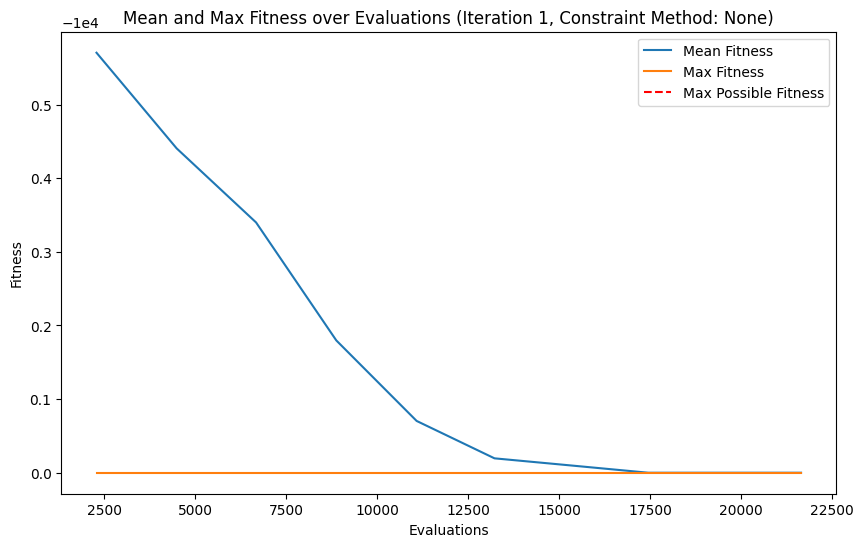

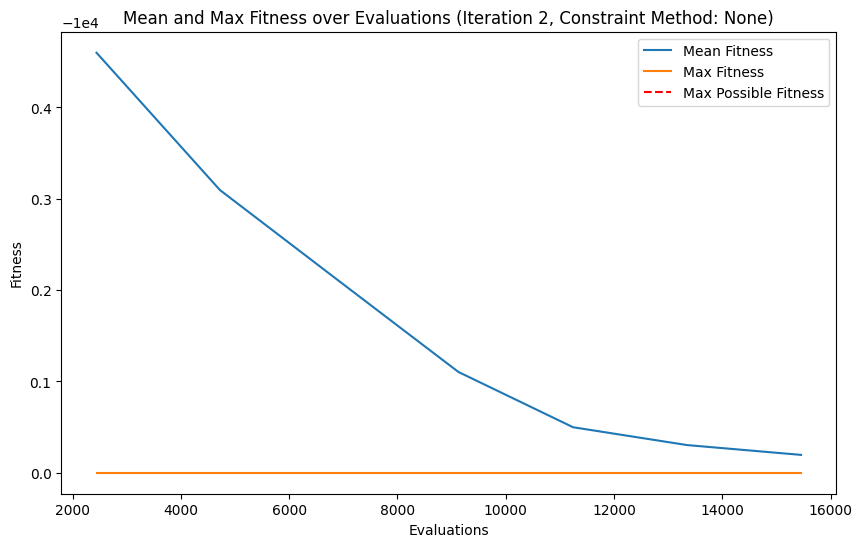

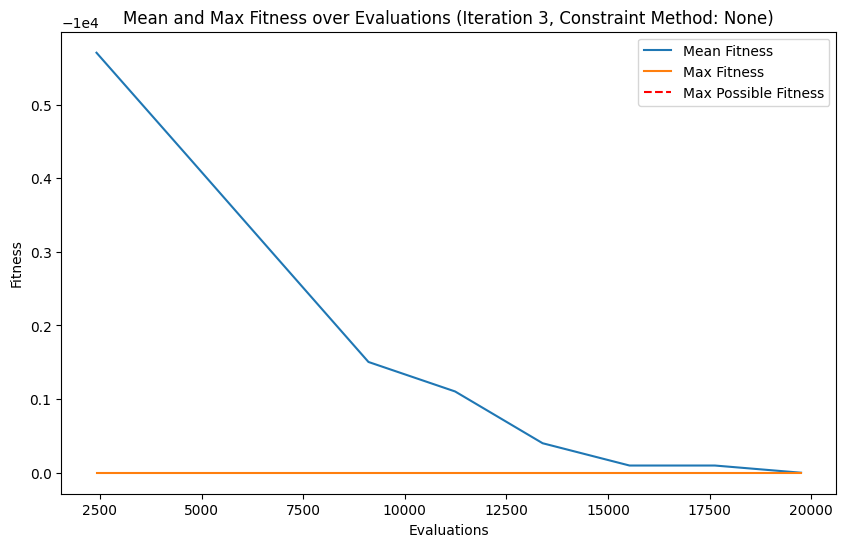

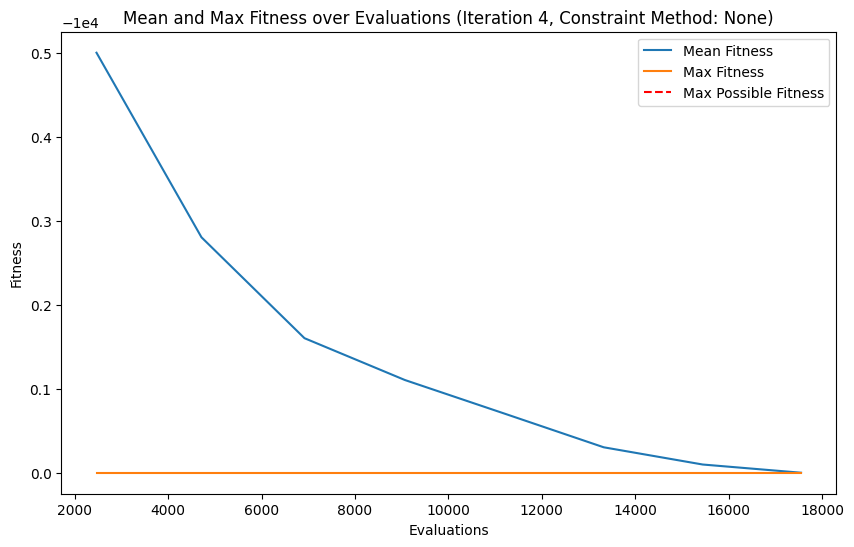

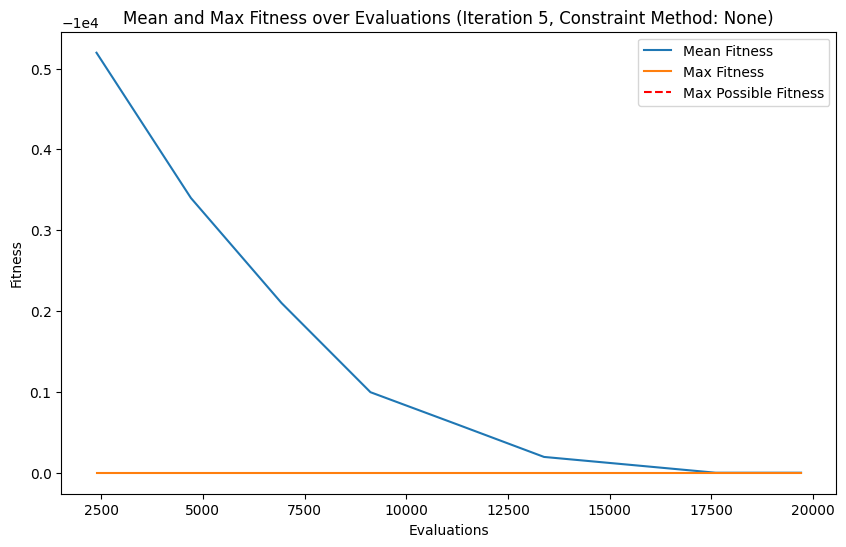

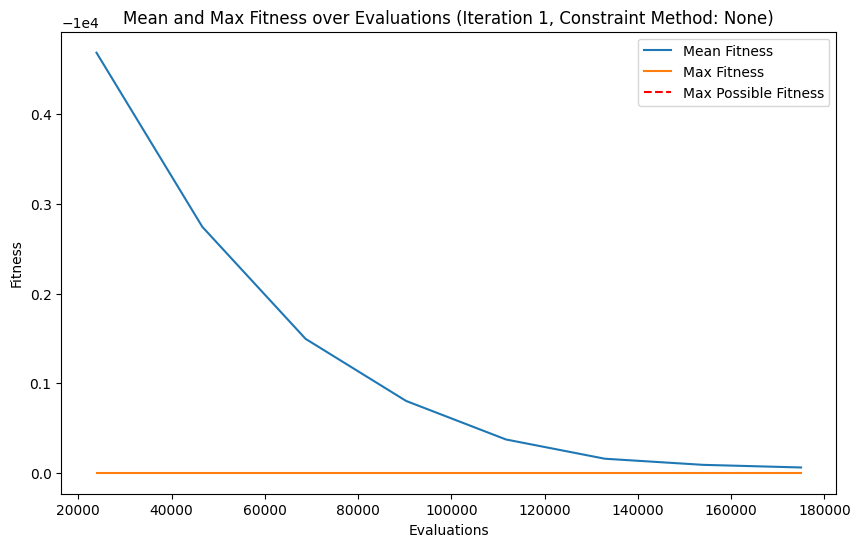

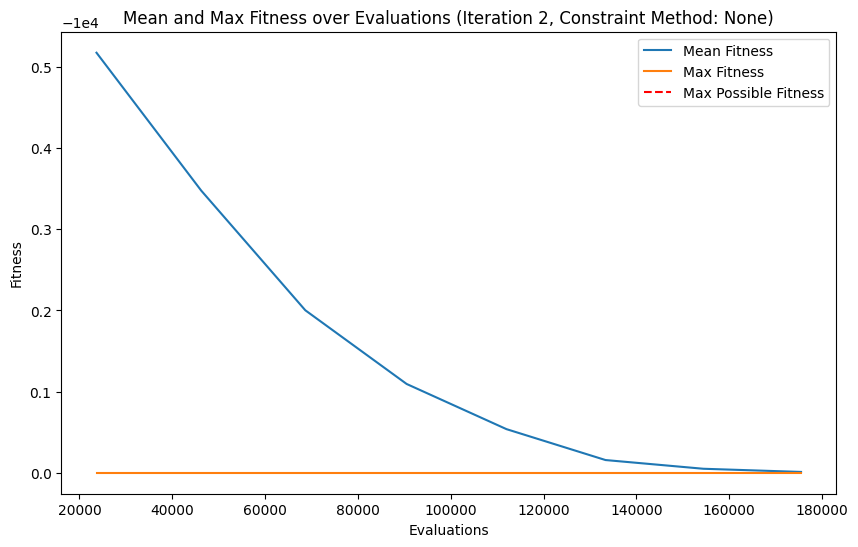

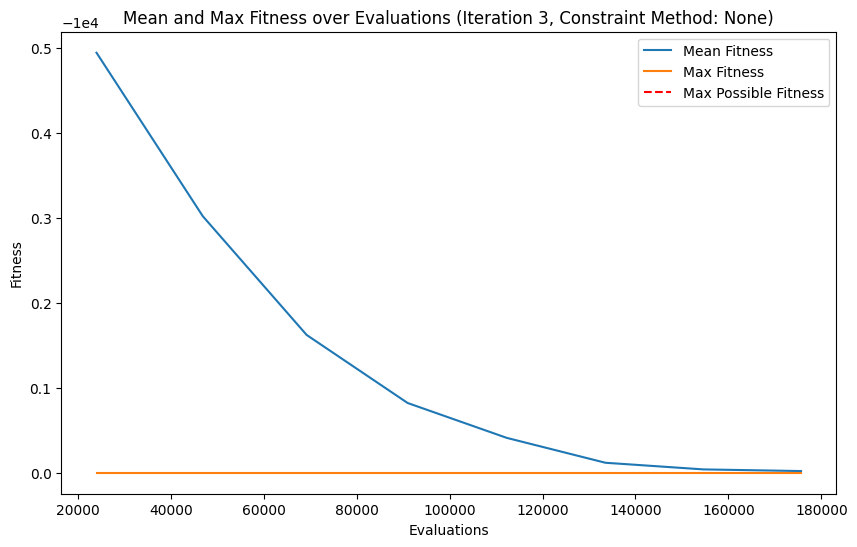

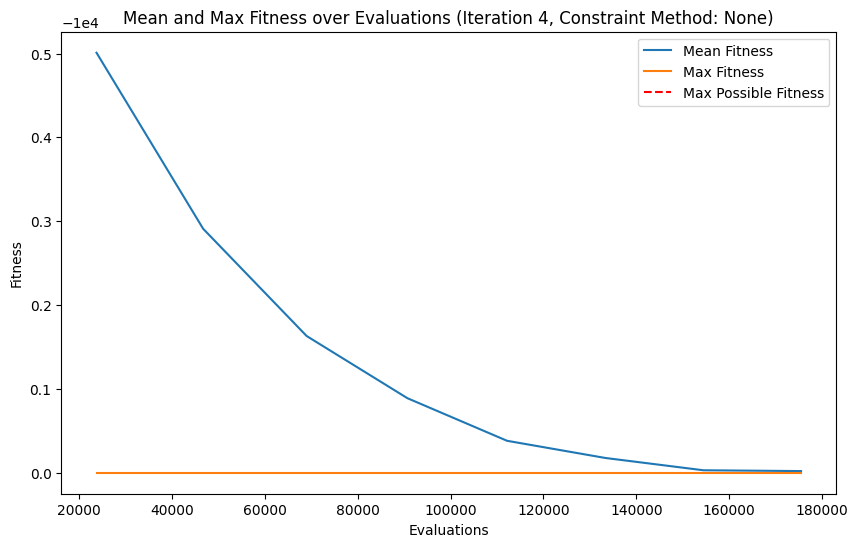

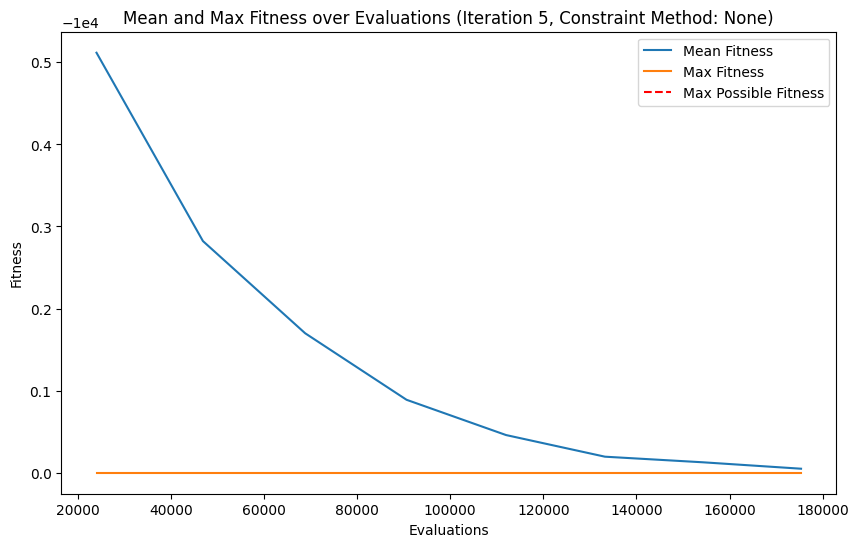

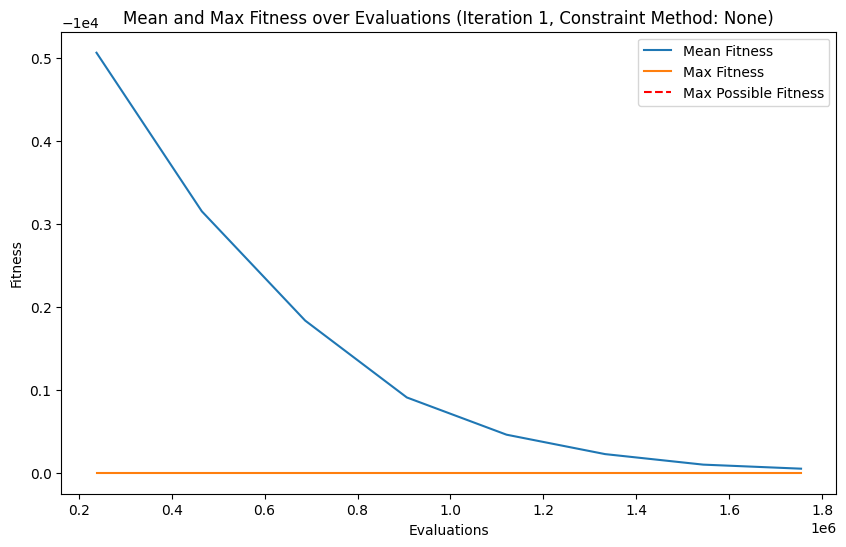

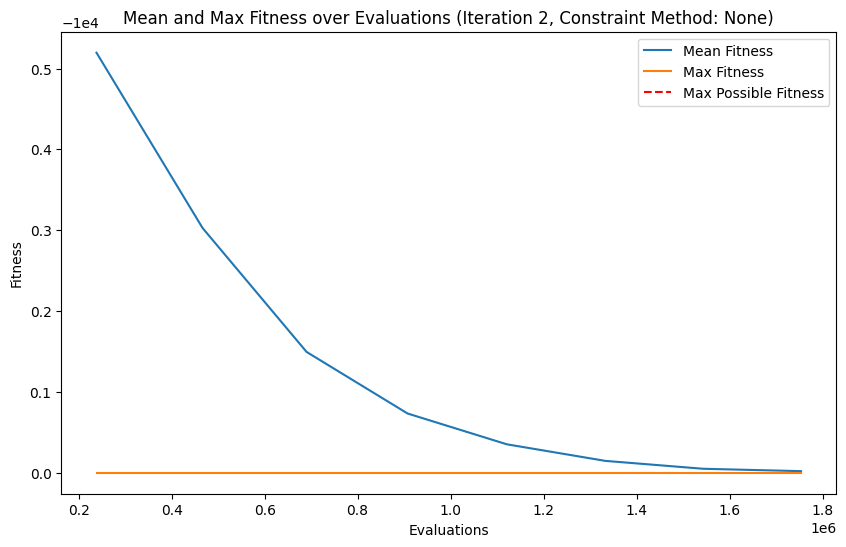

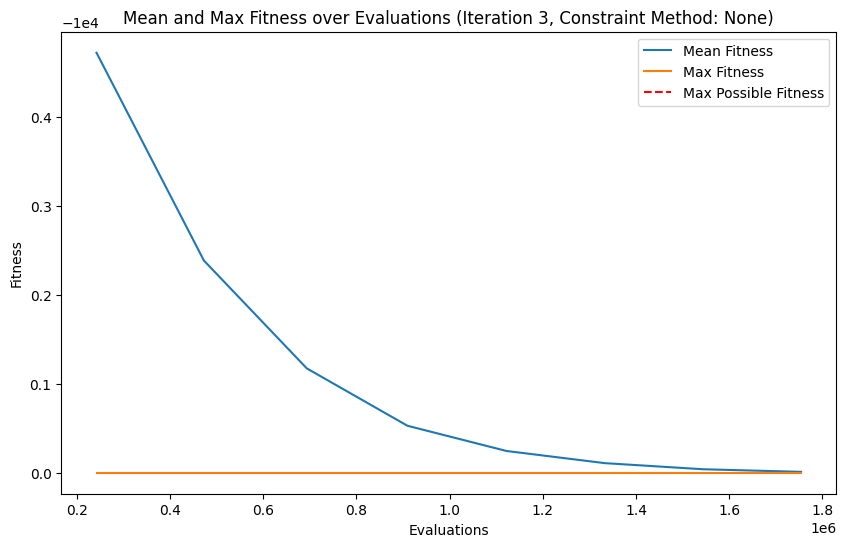

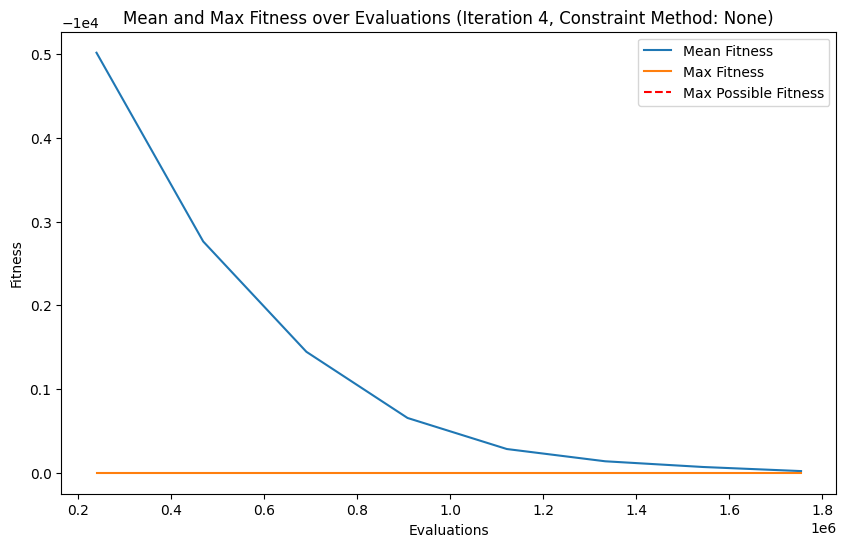

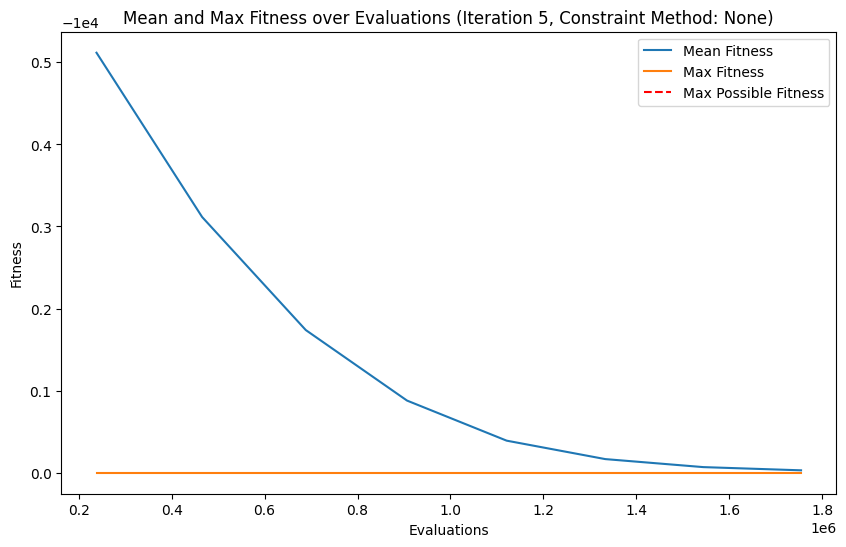

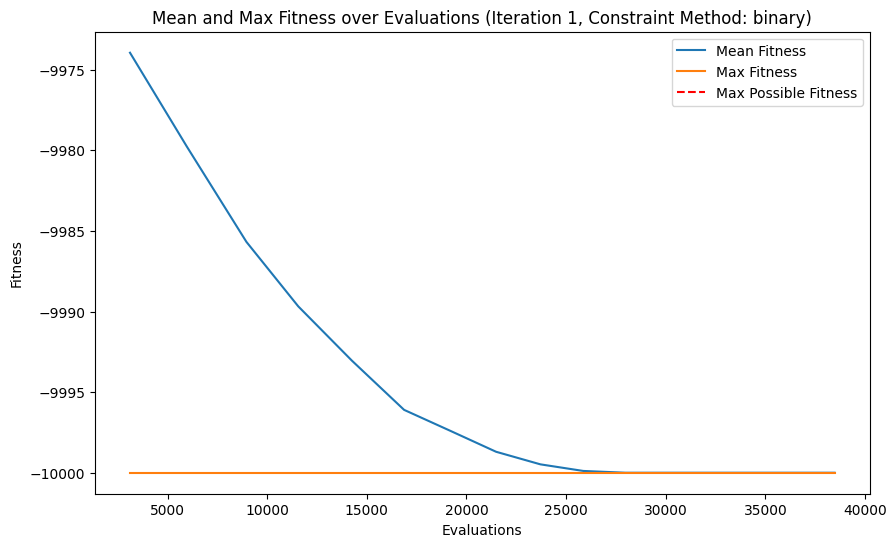

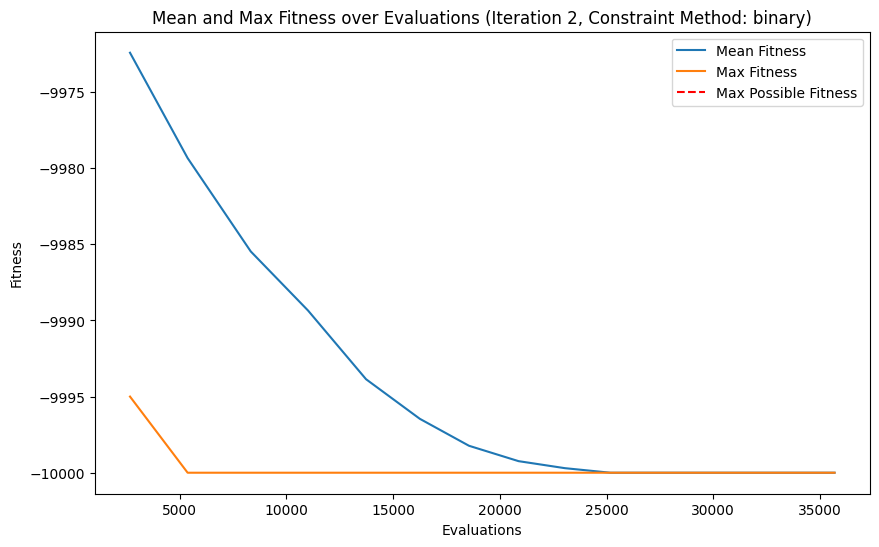

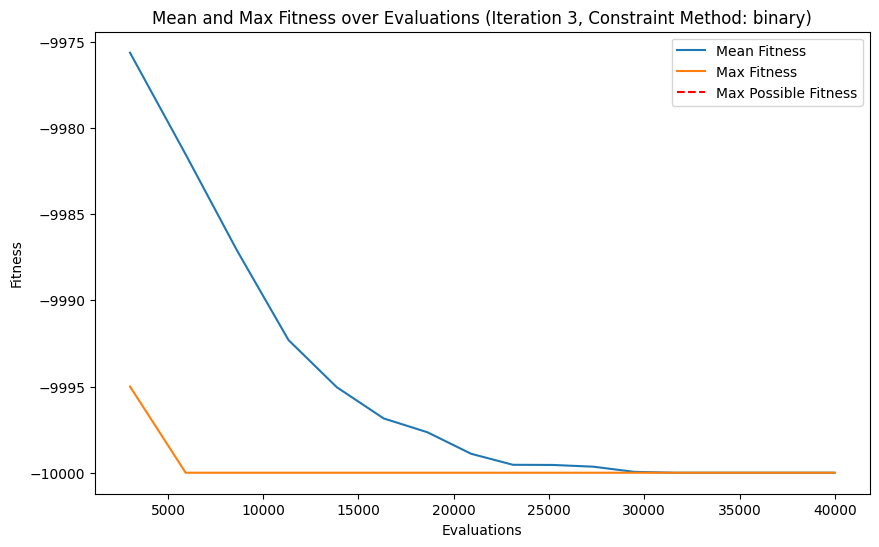

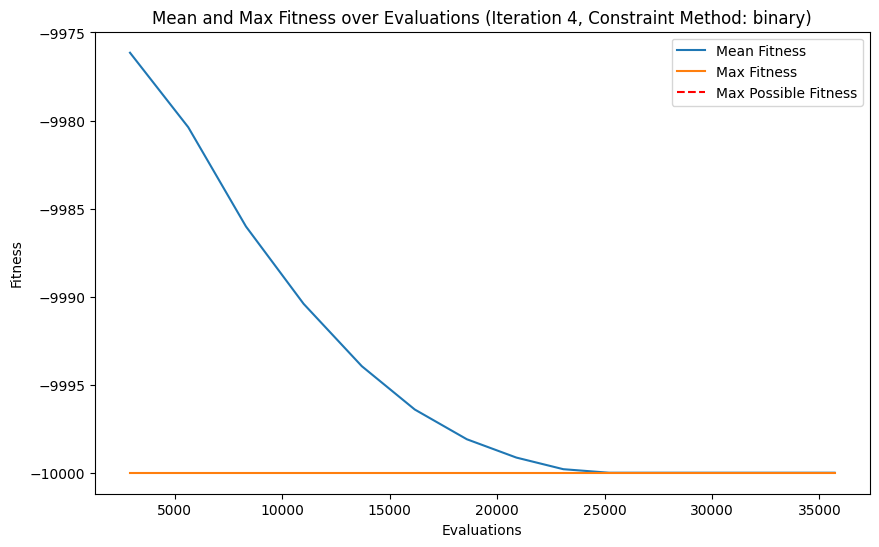

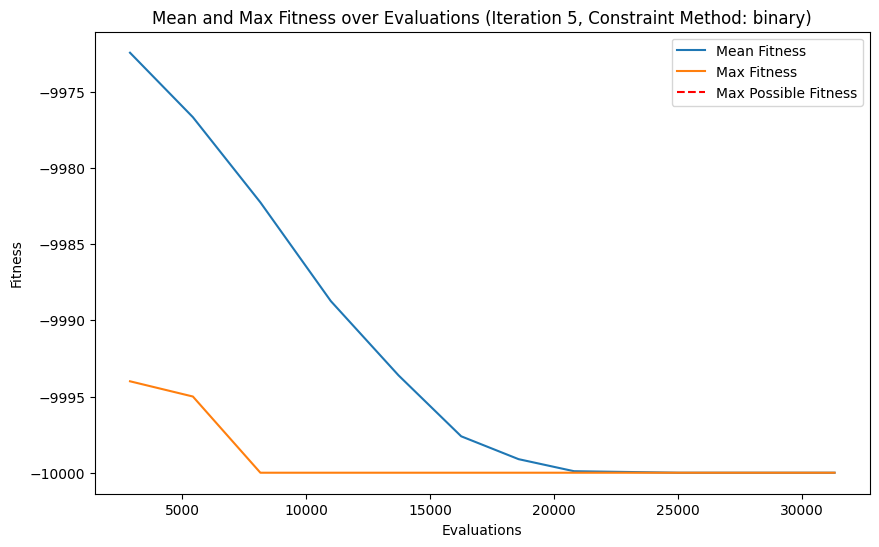

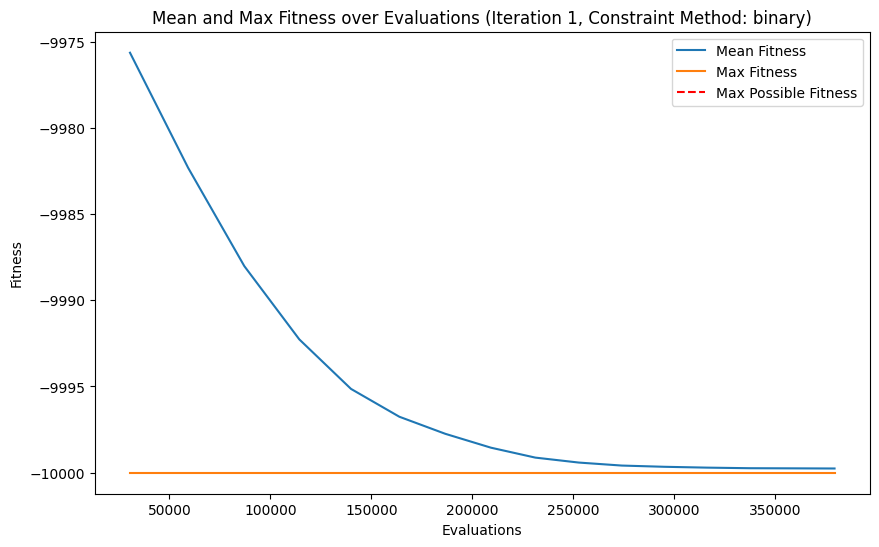

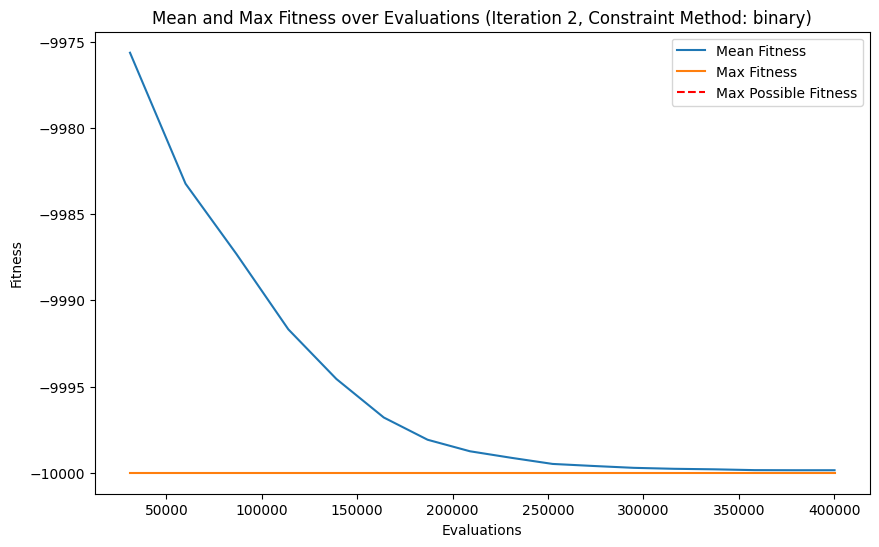

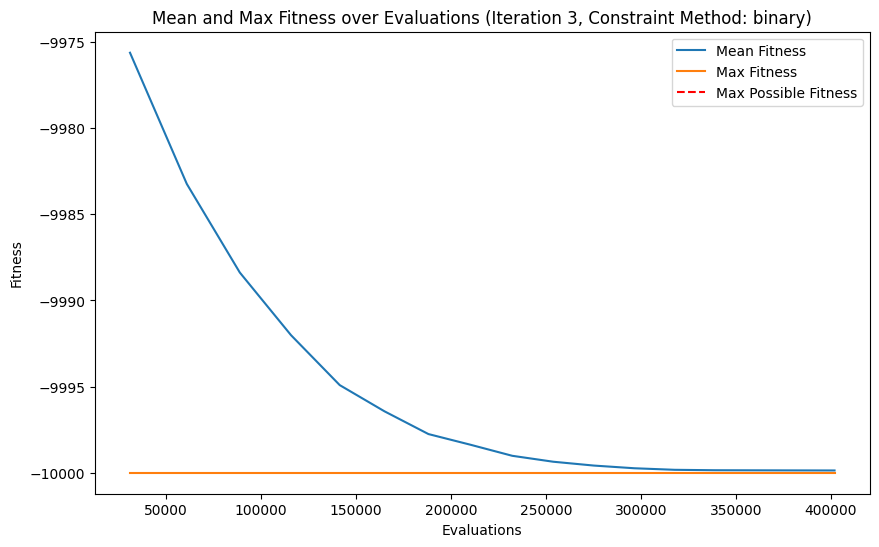

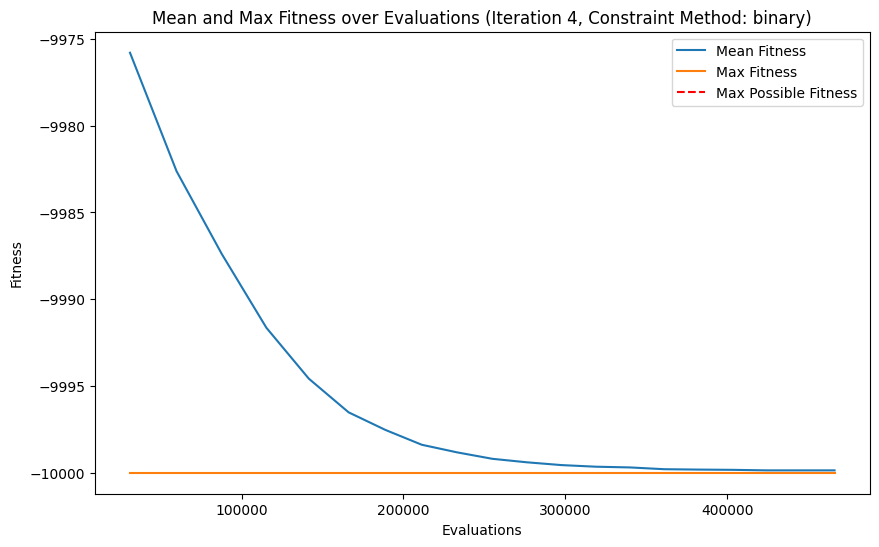

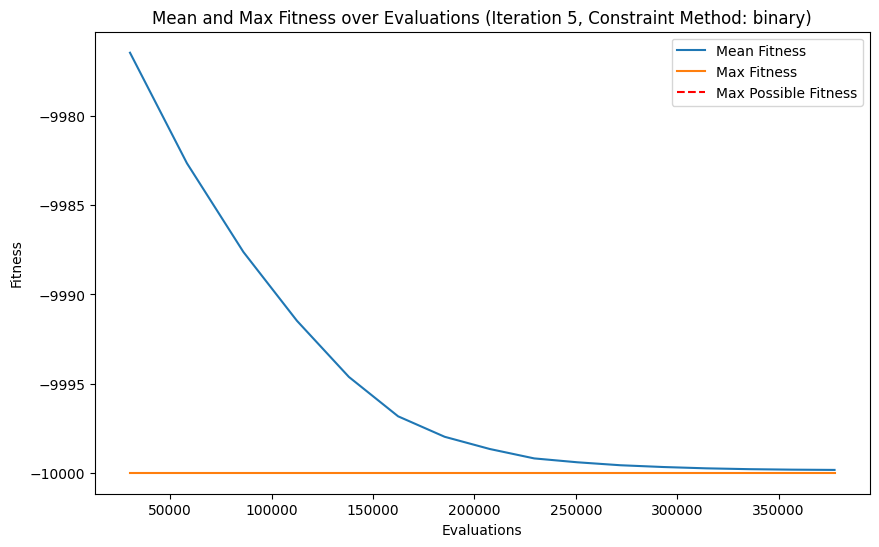

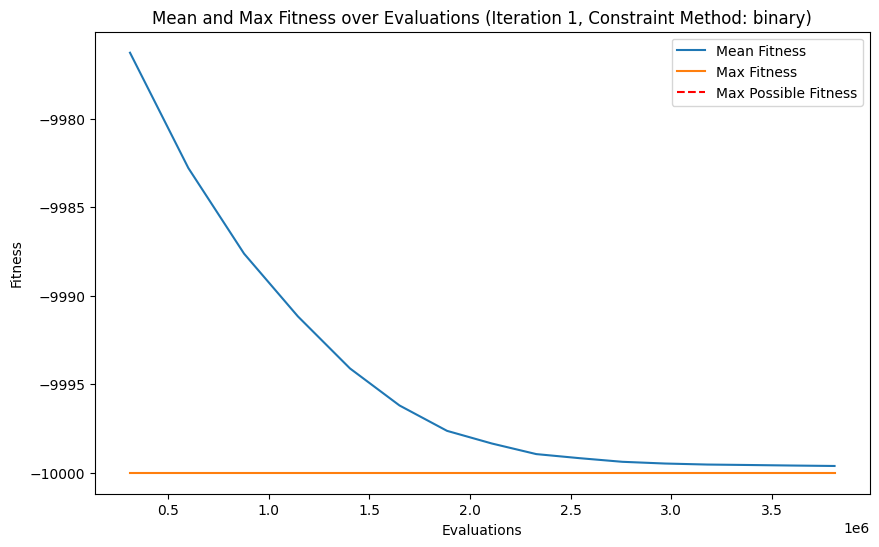

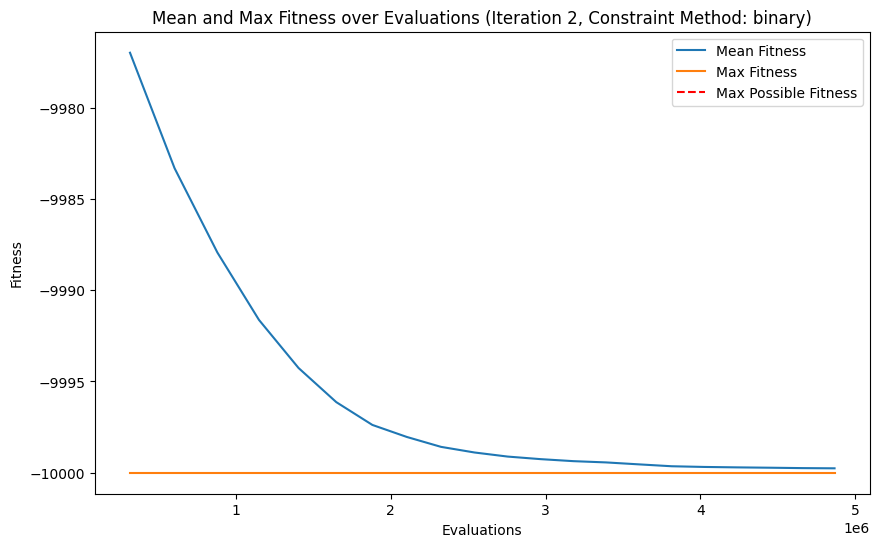

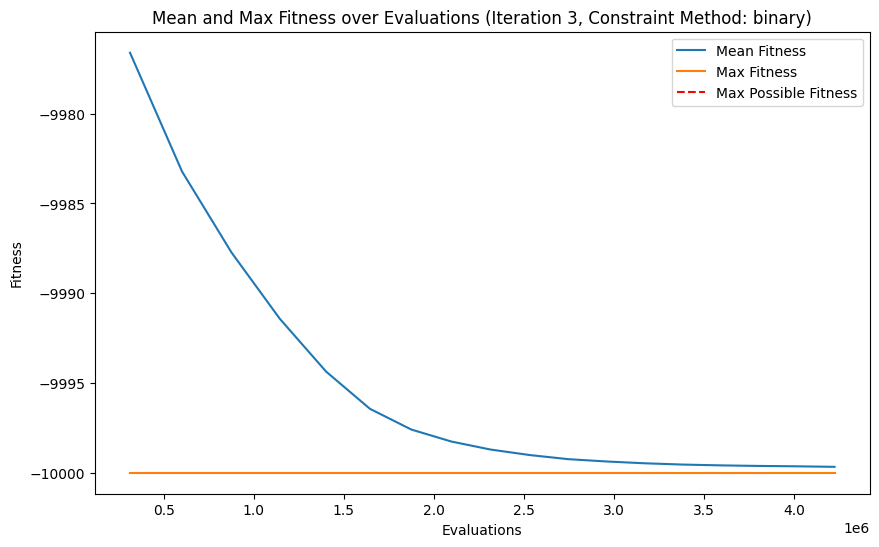

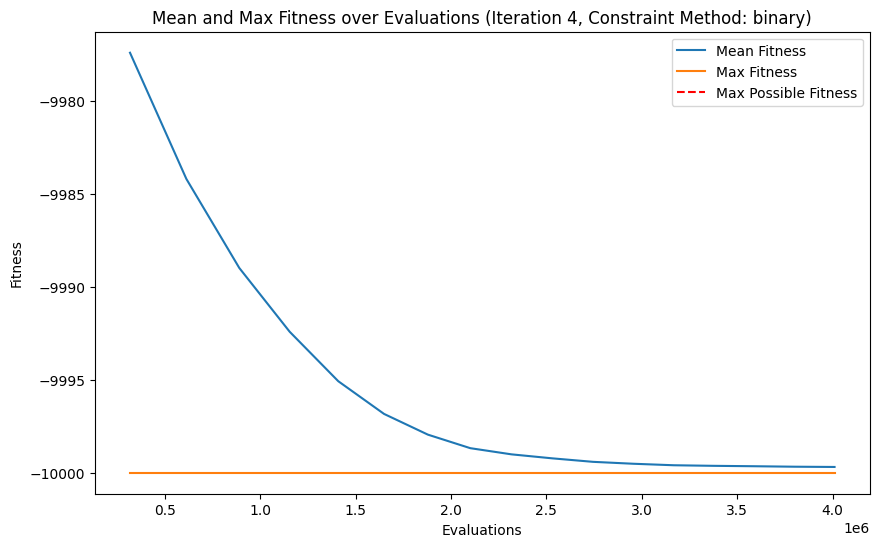

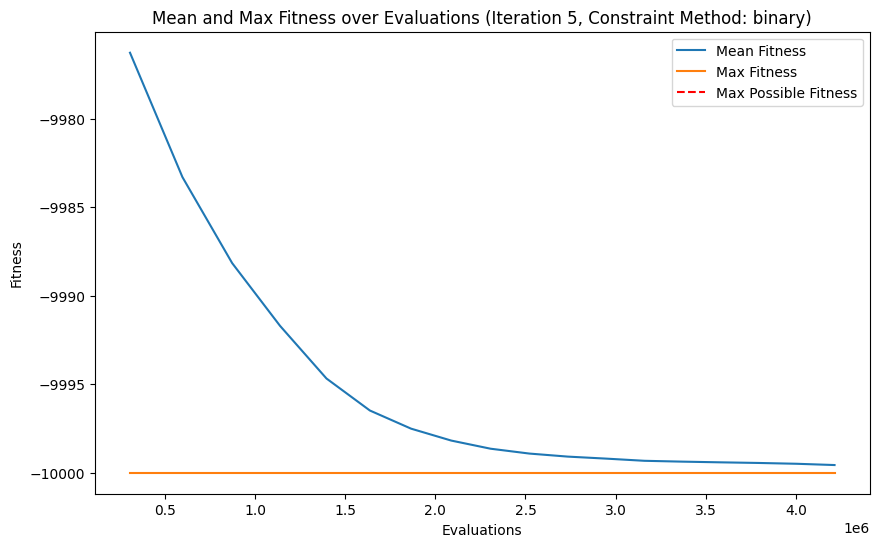

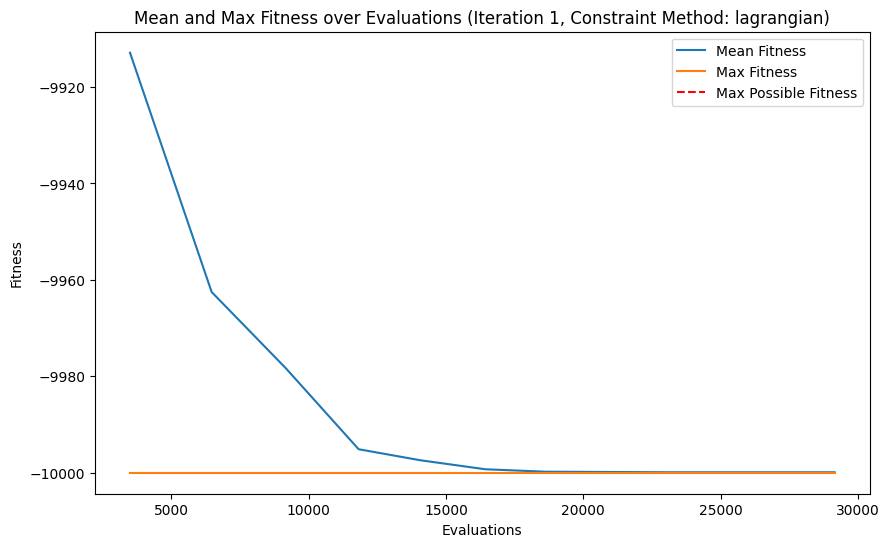

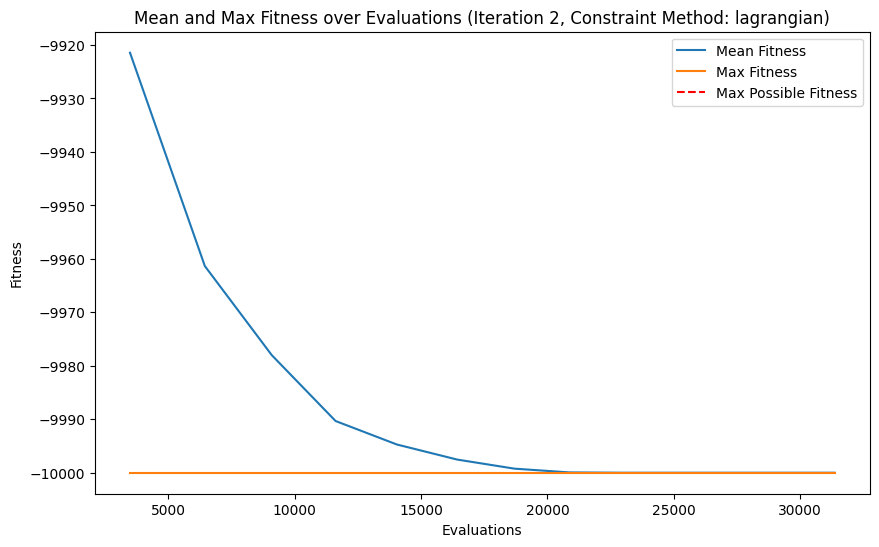

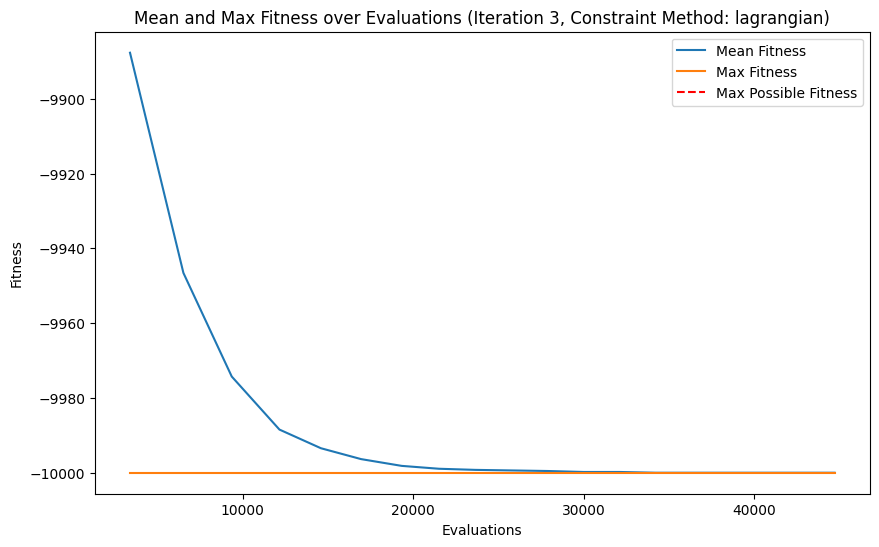

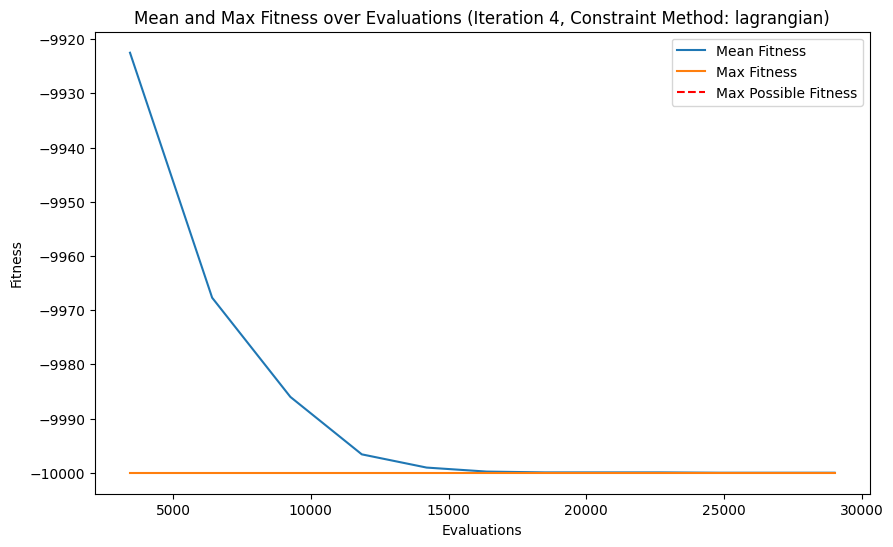

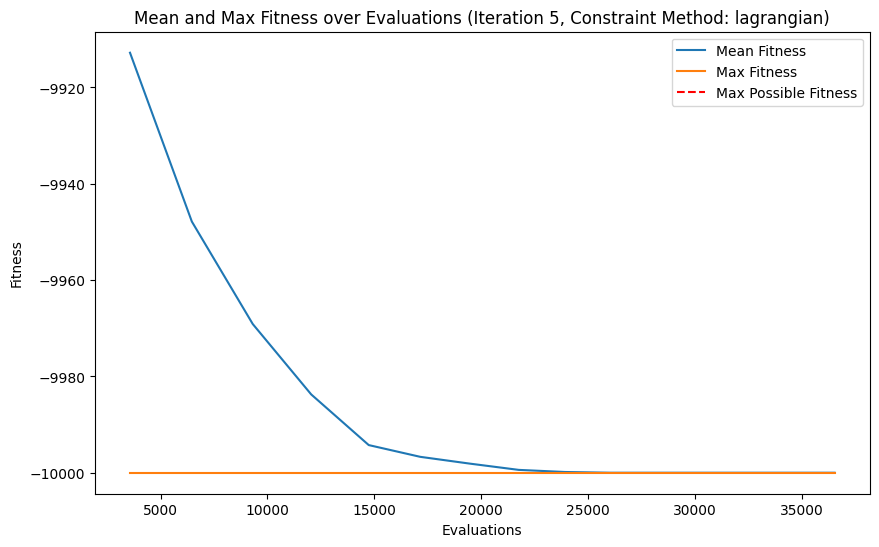

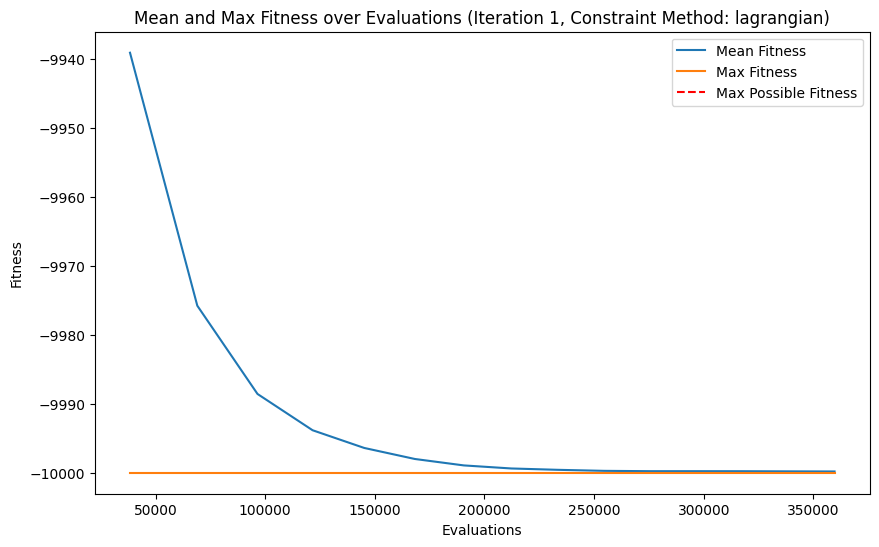

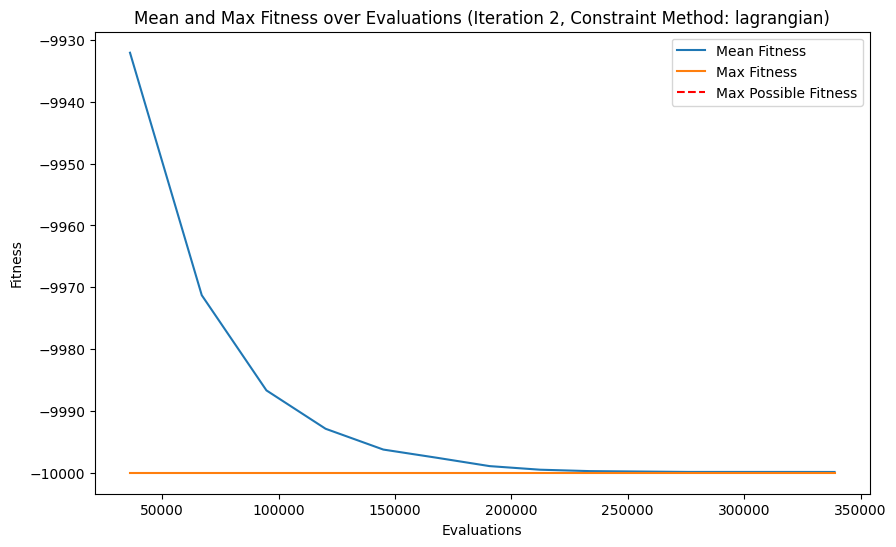

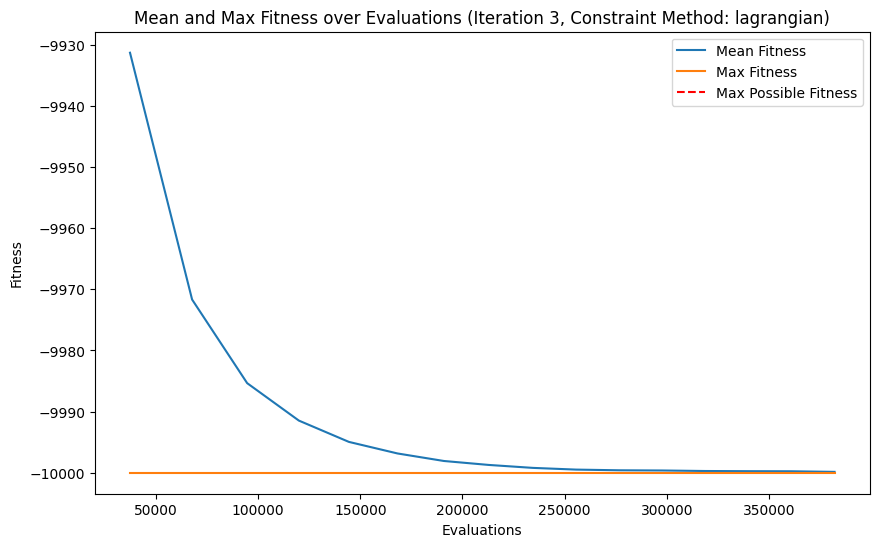

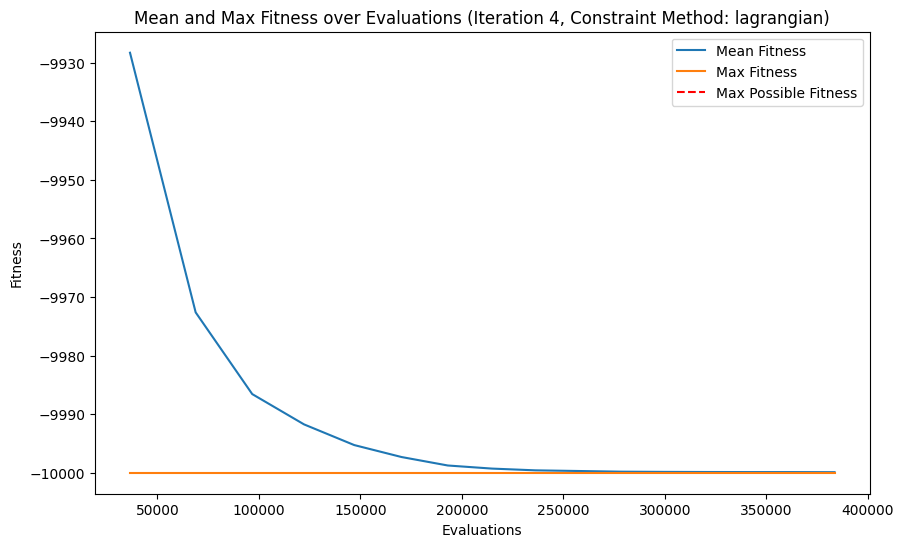

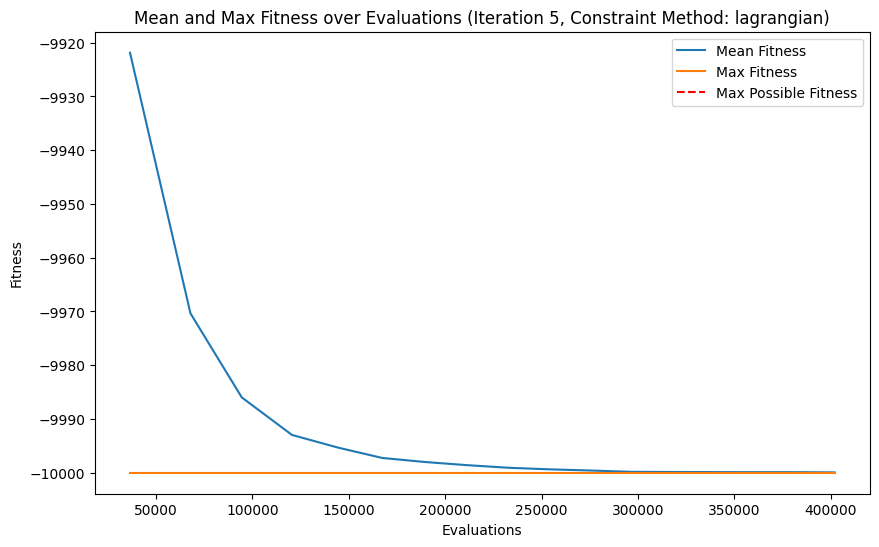

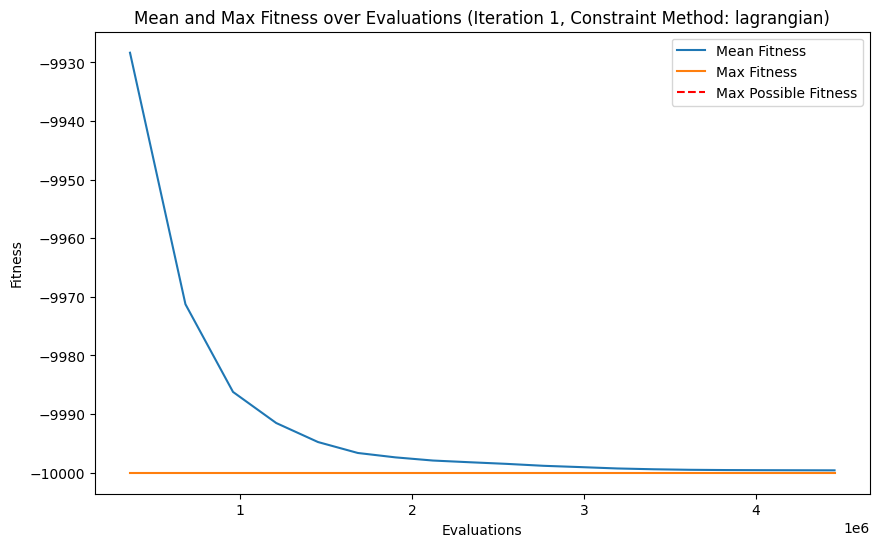

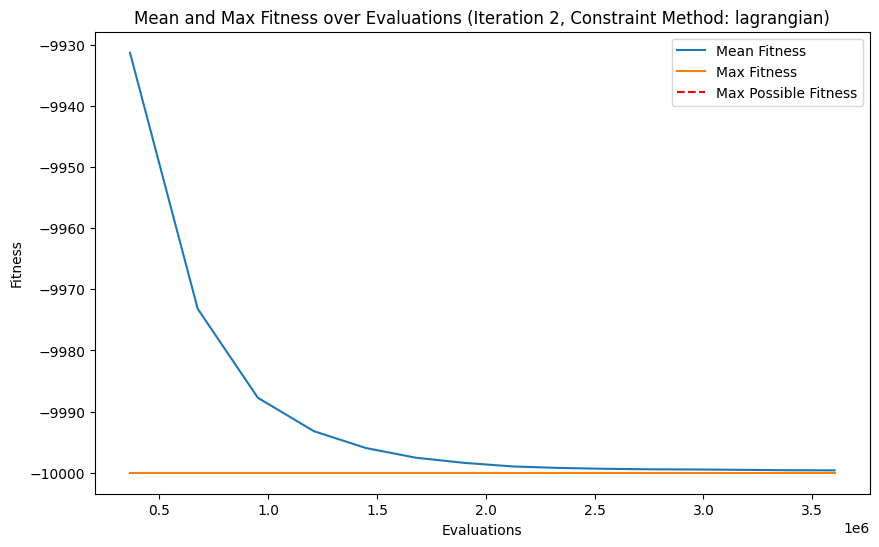

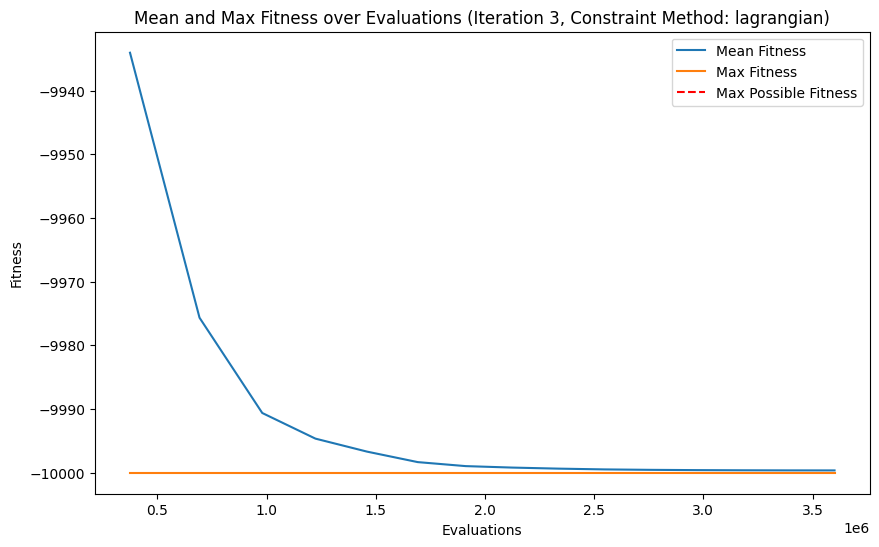

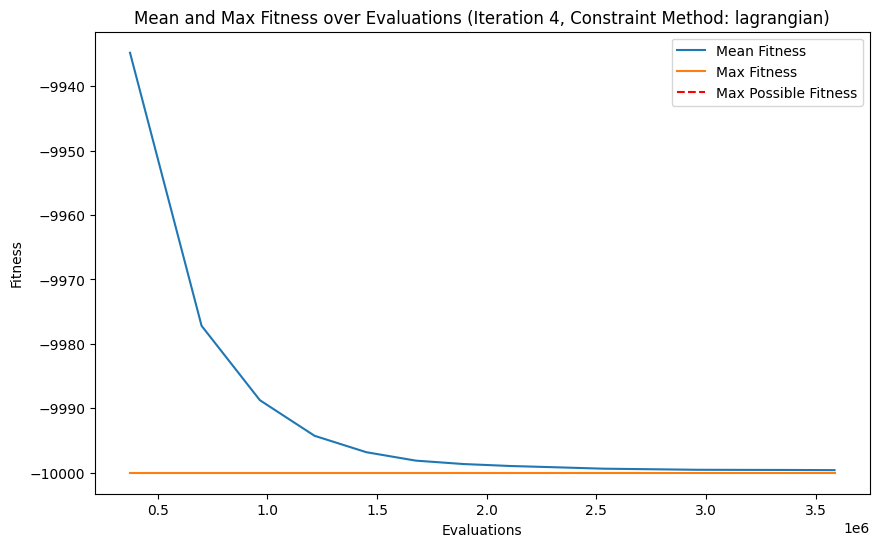

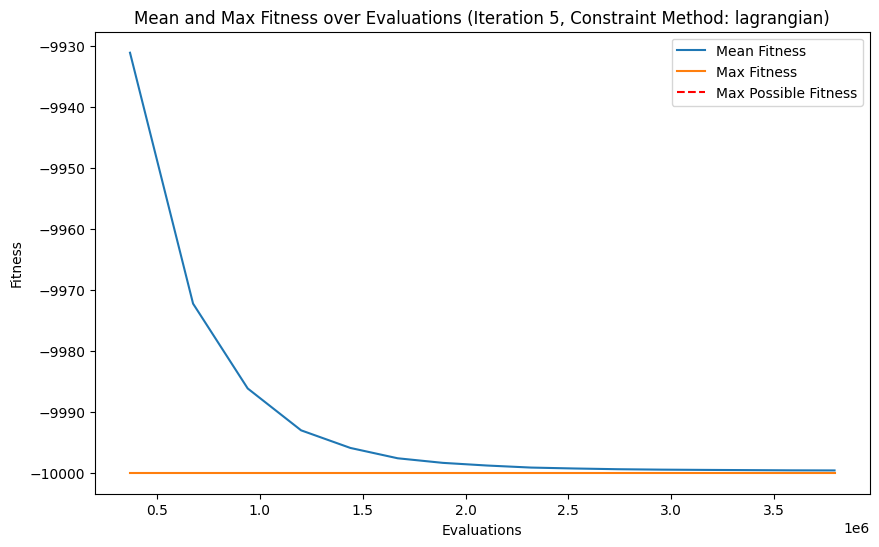

In [6]:
for dataset in datasets:
    for constraint_method in constraint_methods:  # Updated variable name
        for pop_size in pop_size_options:
            # Load jobs
            json_file = f'../data/ssjsp/{dataset}.json'
            jobs = load_jobs_from_json(json_file)

            # Set problem size based on the dataset
            file_paths = [f'../data/qubo/{dataset}.txt']
            problem_size = len(jobs)
            base_params['problem_size'] = problem_size
            base_params['pop_size'] = pop_size
            base_params['constraint_method'] = constraint_method

            print(f"\nStarting experiments for dataset {dataset} with population size {pop_size} and constraint method {constraint_method}")

            # Define a group name for the experiment
            group_name = f"{dataset}_popsize_{pop_size}_constraint_{constraint_method}"

            for iteration in range(num_iterations):
                unique_id = uuid.uuid4().hex  # Generate a unique ID for the pair

                print(f"Iteration {iteration + 1}/{num_iterations} for {dataset}, constraint method: {constraint_method}, population size: {pop_size}")

                if use_wandb:
                    wandb.init(
                        project="Deep Optimization with Constraints",
                        group=group_name,  # Grouping experiments
                        tags=[problem_type, f"constraint_method={constraint_method}", f"id={unique_id}"],
                        name=f"{dataset}_run_{iteration + 1}_{constraint_method}"
                    )
                    wandb.config.update(base_params)
                    wandb.log_artifact(json_file, type='dataset')

                if problem_type == 'QUBO':
                    problem = QUBO(file_paths[0], base_params['problem_instance_id'], device)
                    if base_params['constraint_method']:
                        problem.jobs = jobs
                elif problem_type == 'MKP':
                    problem = MKP(file_paths[0], file_paths[1], base_params['problem_instance_id'], device)
                else:
                    raise ValueError("Unsupported problem type")

                model = DOAE(base_params['problem_size'], base_params['dropout_prob'], device)
                handler = OptimAEHandler(model, problem, device)

                population, fitnesses = handler.generate_population(base_params['pop_size'], base_params['constraint_method'], base_params['penalty_mult'])
                population, fitnesses, _, _ = handler.hilldescent(population, fitnesses, base_params['change_tolerance'], base_params['constraint_method'], base_params['penalty_mult'])
                handler.print_statistics_min(fitnesses)

                total_eval = 0
                depth = 0

                mean_fitnesses = []
                min_max_fitnesses = []
                total_evaluations = []
                mean_fitness_changes = []

                while True:
                    if depth < base_params['max_depth']:
                        hidden_size = round(base_params['problem_size'] * base_params['compression_ratio'])
                        model.transition(hidden_size)
                        depth += 1
                        optimizer = torch.optim.Adam(model.parameters(), lr=base_params['learning_rate'], weight_decay=base_params['l2_coef'])
                    
                    handler.learn_from_population(population, optimizer, l1_coef=base_params['l1_coef'], batch_size=base_params['pop_size'])
                    
                    population, fitnesses, evaluations, done = handler.optimise_solutions_min(
                        population, fitnesses, base_params['change_tolerance'], encode=base_params['encode'], repair_solutions=base_params['repair_solutions'], deepest_only=base_params['deepest_only'], 
                        check_constraints=base_params['constraint_method'], penalty_mult=base_params['penalty_mult']
                    )
                    handler.print_statistics_min(fitnesses)

                    mean_fitness = fitnesses.mean().item()
                    min_max_fitness = fitnesses.min().item()
                    total_eval += evaluations

                    mean_fitnesses.append(mean_fitness)
                    min_max_fitnesses.append(min_max_fitness)
                    total_evaluations.append(total_eval)

                    print(f"Iteration {iteration + 1}, Depth {depth}, Evaluations: {total_eval}, Mean Fitness: {mean_fitness:.4f}, Min Fitness: {min_max_fitness:.4f}")

                    if use_wandb:
                        wandb.log({
                            "mean_fitness": mean_fitness,
                            "min_max_fitness": min_max_fitness,
                            "total_eval": total_eval,
                            "depth": depth,
                            "current_iteration": iteration + 1,
                            "population_size": pop_size,
                            "constraint_method": constraint_method,
                            "dataset": dataset,
                        })

                    if len(mean_fitnesses) > 1:
                        mean_fitness_change = abs(mean_fitnesses[-1] - mean_fitnesses[-2])
                        mean_fitness_changes.append(mean_fitness_change)
                        
                        if len(mean_fitness_changes) >= base_params['patience']:
                            recent_changes = mean_fitness_changes[-base_params['patience']:]
                            if all(change < base_params['delta_mean_population'] for change in recent_changes):
                                break
                    
                    if done:
                        break

                plt.figure(figsize=(10, 6))
                plt.plot(total_evaluations, mean_fitnesses, label='Mean Fitness')
                plt.plot(total_evaluations, min_max_fitnesses, label='Max Fitness')
                plt.axhline(y=problem.max_fitness, color='r', linestyle='--', label='Max Possible Fitness')
                plt.xlabel('Evaluations')
                plt.ylabel('Fitness')
                plt.title(f'Mean and Max Fitness over Evaluations (Iteration {iteration + 1}, Constraint Method: {constraint_method})')
                plt.legend()

                if use_wandb:
                    wandb.log({"fitness_plot": wandb.Image(plt)})

                solutions = get_solutions(population, fitnesses, mode='low')
                total_feasible_solutions = 0
                total_infeasible_solutions = 0
                logs = []

                for i, solution in enumerate(solutions):
                    feasible, infeasible_jobs, makespans = check_constraints(solution, jobs)
                    if feasible:
                        total_feasible_solutions += 1
                    else:
                        total_infeasible_solutions += 1
                    
                    logs.append({
                        'solution_number': i + 1,
                        'feasible': feasible,
                        'infeasible_jobs': infeasible_jobs,
                        'makespans': makespans
                    })

                print(f"Completed Iteration {iteration + 1} for dataset {dataset} with constraint method {constraint_method}.")
                print(f'Total feasible solutions: {total_feasible_solutions}')
                print(f'Total infeasible solutions: {total_infeasible_solutions}')

                if use_wandb:
                    wandb.log({
                        'solutions': logs,
                        'total_feasible_solutions_count': total_feasible_solutions,
                        'total_infeasible_solutions': total_infeasible_solutions
                    })

                if use_wandb:
                    wandb.finish()